Soal Nomor 1:
Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:
  Pertama, bersuara pelan. Kedua, relatif bersuara dengan volume sedang. Ketiga, relatif bersuara dengan volume tinggi. Keempat, bersuara volume sedang, namun mengucapkan kata-kata dengan huruf  s  yang panjang ( essssss ). Kelima, bersuara volume sedang, mengucapkan kata  brrbrbrbrb  / lip trill.
  Masing-masing silahkan membuat file wav/mp3/flac yang sesuai dengan ketentuan tersebut (5 file).
   Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio
tersebut.
   Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.


In [1]:
import matplotlib.pyplot as plt #berfungsi untuk membuat berbagai visualisasi data seperti grafik,   diagram batang, dan histogram
import numpy as np #digunakan untuk komputasi ilmiah di Python. Dalam percobaan ini, digunakan untuk menghasilkan array yang terdiri dari sejumlah titik yang tersebar merata antara dua nilai tertentu, menggunakan fungsi linspace
import os #digunakan untuk melakukan operasi pada sistem file sehingga dapat mengakses path file audio sampel
import wave #digunakan untuk memvisualisasikan data audio dalam bentuk Diagram Gelombang (Waveform)
import librosa #digunakan untuk memvisualisasikan data audio menjadi Spektogram
import librosa.display 

In [2]:
file_jalur = os.path.join(os.getcwd(), 'suara_malenia.wav')

if not os.path.exists(file_jalur):
    print(f"File {file_jalur} not found.")
    exit()

In [3]:
with wave.open(file_jalur, 'r') as wav_file: 
    frem = wav_file.readframes(-1) 
    data_suara = np.frombuffer(frem, dtype='int16')
    rate_sampling = wav_file.getframerate()
    
    # informasi channel
    jumlah_channels = wav_file.getnchannels()

wave.open : digunakan untuk membuka file audio.
 r : berarti file audio dibuka dalam mode baca (read).
 with  dan  as  emastikan file audio akan tertutup secara otomatis setelah selesai digunakan..
 frem = wav_file.readframes(-1) 
   readframes(-1)  : berfungsi untuk membaca semua frame audio.
 np.frombuffer  : digunakan untuk mengubah frame audio menjadi array numpy.
   dtype='int16'  : digunakan untuk menentukan tipe data array numpy. Dalam hal ini, audio akan diubah menjadi array dengan tipe data int16 dikarenakan audio ini adalah audio 16-bit.
 wav_file.getframerate() : digunakan untuk memperoleh frekuensi sampling dari audio.
 wav_file.getnchannels() : berfungsi untuk mendapatkan jumlah channel pada audio.
 wav_file.getsampwidth() : digunakan untuk mengetahui lebar sampel (sample width) dari file audio yang sedang dibuka.


In [4]:
print(f"Isi dari sound_data: {data_suara}")
print(f"Panjang dari sound_data: {len(data_suara)}")
print(f"Sampling rate: {rate_sampling}")
print(f"Jumlah channel: {jumlah_channels}")

Isi dari sound_data: [0 0 0 ... 0 0 0]
Panjang dari sound_data: 8744960
Sampling rate: 44100
Jumlah channel: 2


In [5]:
data_suara = data_suara.reshape(-1, jumlah_channels)
print(f"Shape dari `sound_data` setelah di reshape: {data_suara.shape}")

audio_kiri_data = data_suara[:, 0]
audio_kanan_data = data_suara[:, 1]

print(f"Panjang Audio Kiri: {len(audio_kiri_data)}")
print(f"Panjang Audio Kanan: {len(audio_kanan_data)}")

Shape dari `sound_data` setelah di reshape: (4372480, 2)
Panjang Audio Kiri: 4372480
Panjang Audio Kanan: 4372480


In [6]:
sampel_panjang_audio = len(audio_kiri_data)
print(f"Panjang Audio Sampel: {sampel_panjang_audio}")

detik_panjang_audio = sampel_panjang_audio / rate_sampling
print(f"Panjang Audio Detik: {detik_panjang_audio}")

# Membuat sumbu waktu
sumbu_time = np.linspace(0, detik_panjang_audio, sampel_panjang_audio)

Panjang Audio Sampel: 4372480
Panjang Audio Detik: 99.14920634920635


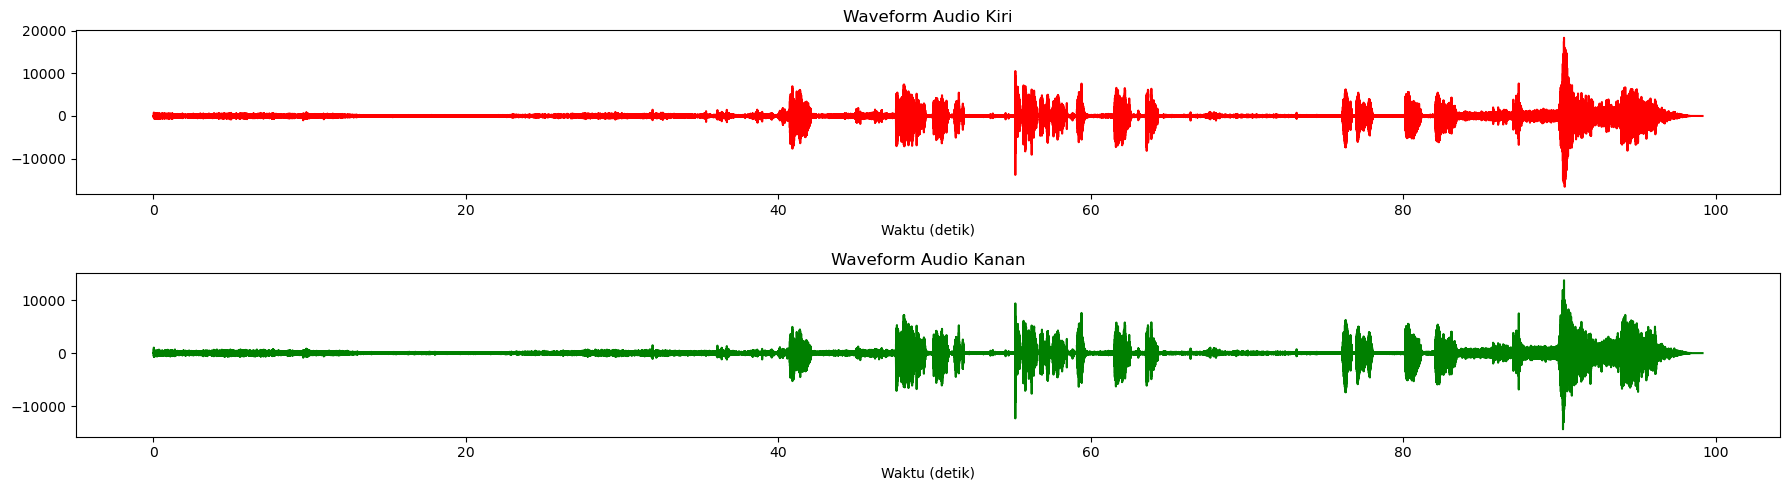

In [7]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time, audio_kiri_data, label='Kiri', color='red')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(sumbu_time, audio_kanan_data, label='Kanan', color= 'green')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Visualisasi yang dihasilkan menggunakan  waveforms  dari suara bervolume sedang   menunjukkan bahwa grafik puncak amplitudo yang cukup besar 

In [8]:
data_suara, sr = librosa.load(file_jalur)
S = librosa.stft(data_suara)
S_db = librosa.amplitude_to_db(np.abs(S))
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


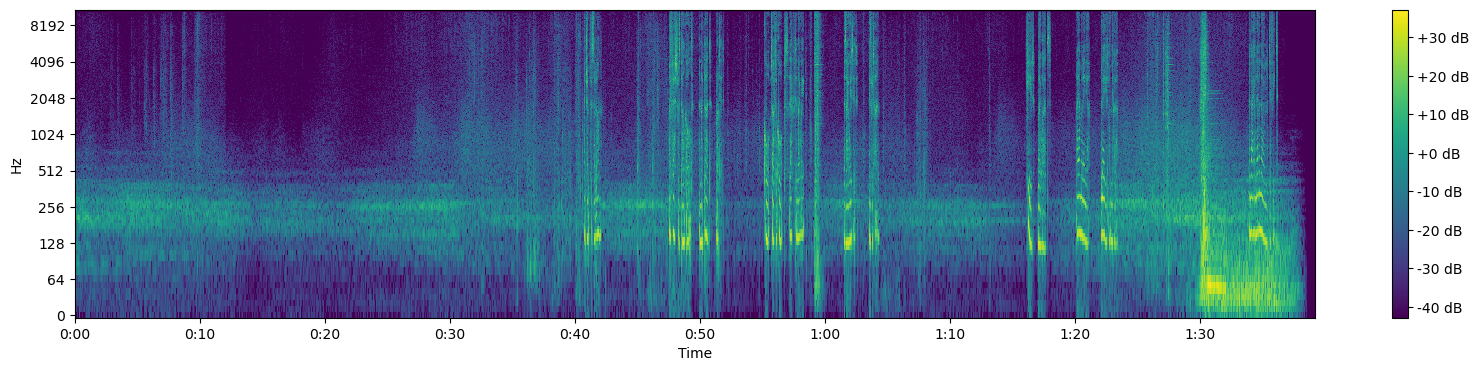

In [9]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.show()

Visualisasi yang dihasilkan menggunakan spektogram dari suara dengan volume sedang menunjukkan grafik yang didominasi oleh warna gelap, yang mengindikasikan bahwa suara bervolume sedang menghasilkan spektogram dengan tampilan yang cenderung lebih gelap

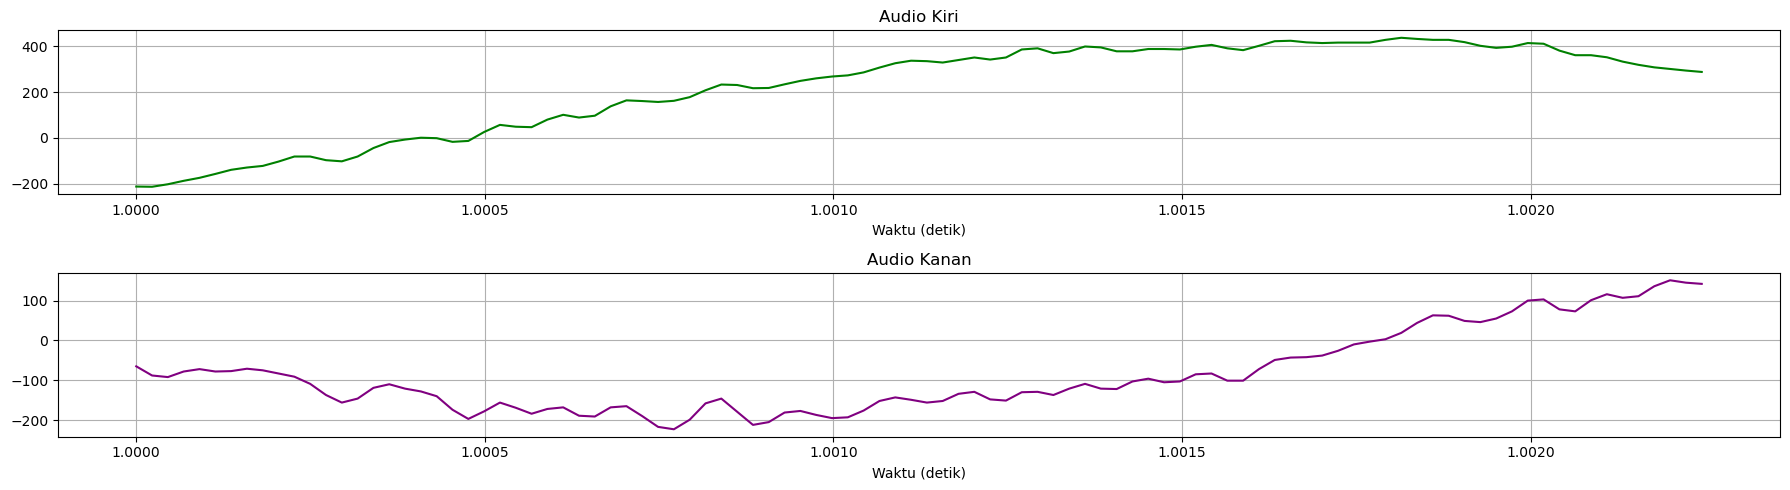

In [10]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time[44100:44200], audio_kiri_data[44100:44200], label='Kiri', color='green')
fig[0].set_title('Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid()
fig[1].plot(sumbu_time[44100:44200], audio_kanan_data[44100:44200], label='Kanan',color='purple')
fig[1].set_title('Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid()
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan data audio untuk channel kiri dan kanan (stereo) secara terpisah 		dalam dua grafik. Setiap grafik menggambarkan amplitudo audio dalam interval waktu 		tertentu (sampel 44100 hingga 44200) untuk channel kiri (dengan warna hijau) dan channel 		kanan (dengan warna ungu).

In [11]:
print(f"Data di dalam audio kiri pada sampel ke 44100-44200: {audio_kiri_data[44100:44200]}")
print(f"Data di dalam audio kanan pada sampel ke 44100-44200: {audio_kanan_data[44100:44200]}")

Data di dalam audio kiri pada sampel ke 44100-44200: [-212 -213 -202 -187 -174 -157 -139 -129 -122 -103  -81  -81  -97 -102
  -81  -44  -18   -7    1   -1  -17  -13   26   57   49   47   80  101
   89   97  138  164  161  157  162  178  208  233  231  217  218  234
  249  260  268  273  286  307  326  337  335  329  340  351  342  351
  386  391  370  377  399  395  378  378  388  388  386  398  406  391
  383  402  422  424  417  414  416  416  416  428  437  432  428  428
  418  402  393  398  414  411  381  361  361  352  333  319  308  301
  294  288]
Data di dalam audio kanan pada sampel ke 44100-44200: [ -65  -88  -92  -78  -72  -78  -77  -71  -75  -83  -91 -109 -137 -156
 -146 -119 -110 -121 -128 -140 -174 -197 -178 -156 -169 -184 -172 -168
 -189 -191 -168 -165 -190 -217 -223 -199 -158 -146 -179 -212 -205 -181
 -177 -187 -195 -193 -176 -152 -143 -149 -156 -152 -134 -129 -148 -151
 -130 -129 -137 -121 -109 -121 -122 -103  -96 -105 -103  -85  -83 -101
 -101  -72  -49  -43  -42  -3

 
Pengujian Sampel Suara dengan Volume Relatif rendah


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

In [13]:
file_jalur = os.path.join(os.getcwd(), 'suara_detik jam.wav')

if not os.path.exists(file_jalur):
    print(f"File {file_jalur} not found.")
    exit()

In [14]:
with wave.open(file_jalur, 'r') as wav_file:
    frem = wav_file.readframes(-1)
    data_suara = np.frombuffer(frem, dtype='int16')
    rate_sampling = wav_file.getframerate()
    
    # informasi channel
    jumlah_channels = wav_file.getnchannels()

In [15]:
print(f"Isi dari sound_data: {data_suara}")
print(f"Panjang dari sound_data: {len(data_suara)}")
print(f"Sampling rate: {rate_sampling}")
print(f"Jumlah channel: {jumlah_channels}")

Isi dari sound_data: [0 0 0 ... 0 0 0]
Panjang dari sound_data: 1544192
Sampling rate: 44100
Jumlah channel: 2


In [16]:
data_suara = data_suara.reshape(-1, jumlah_channels)
print(f"Shape dari `sound_data` setelah di reshape: {data_suara.shape}")

audio_kiri_data = data_suara[:, 0]
audio_kanan_data = data_suara[:, 1]

print(f"Panjang Audio Kiri: {len(audio_kiri_data)}")
print(f"Panjang Audio Kanan: {len(audio_kanan_data)}")

Shape dari `sound_data` setelah di reshape: (772096, 2)
Panjang Audio Kiri: 772096
Panjang Audio Kanan: 772096


In [17]:
sampel_panjang_audio = len(audio_kiri_data)
print(f"Panjang Audio Sampel: {sampel_panjang_audio}")

detik_panjang_audio = sampel_panjang_audio / rate_sampling
print(f"Panjang Audio Detik: {detik_panjang_audio}")

# Membuat sumbu waktu
sumbu_time = np.linspace(0, detik_panjang_audio, sampel_panjang_audio)

Panjang Audio Sampel: 772096
Panjang Audio Detik: 17.507845804988662


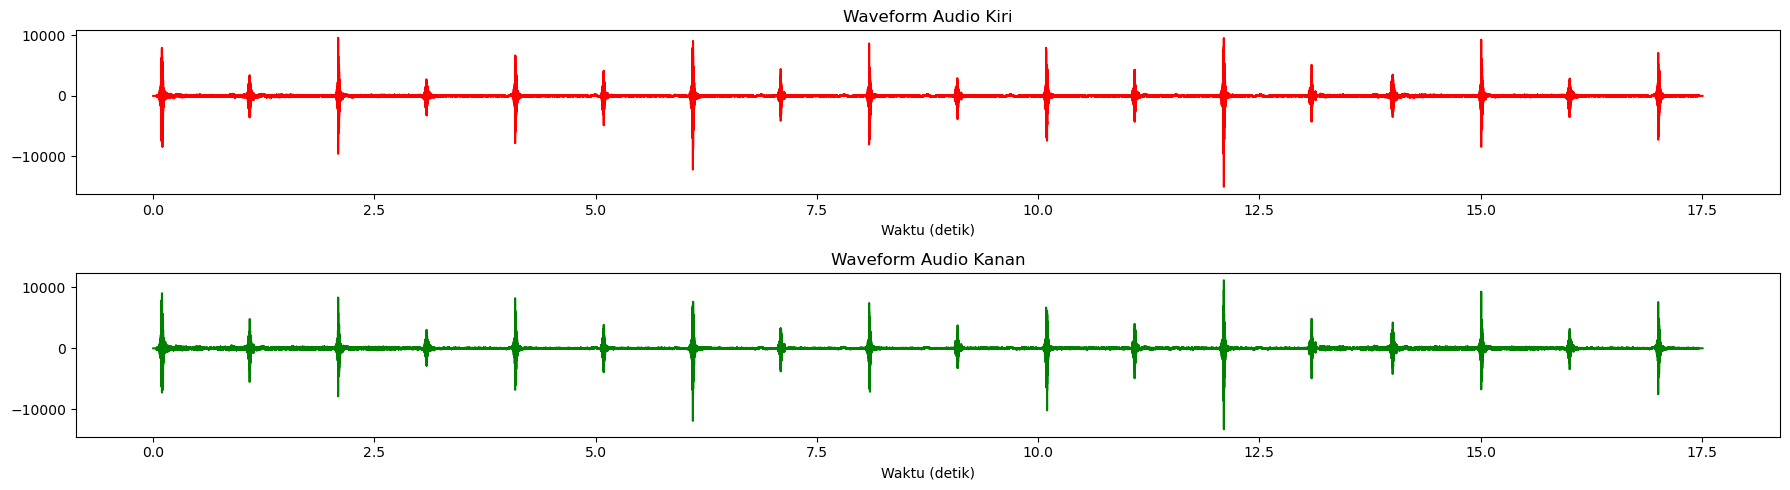

In [18]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time, audio_kiri_data, label='Kiri', color='red')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(sumbu_time, audio_kanan_data, label='Kanan', color= 'green')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Visualisasi yang dihasilkan menggunakan  waveforms  dari suara bervolume  rendah  menunjukkan bahwa grafik puncak amplitudo yang cukup besar 

In [19]:
data_suara, sr = librosa.load(file_jalur)
S = librosa.stft(data_suara)
S_db = librosa.amplitude_to_db(np.abs(S))
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


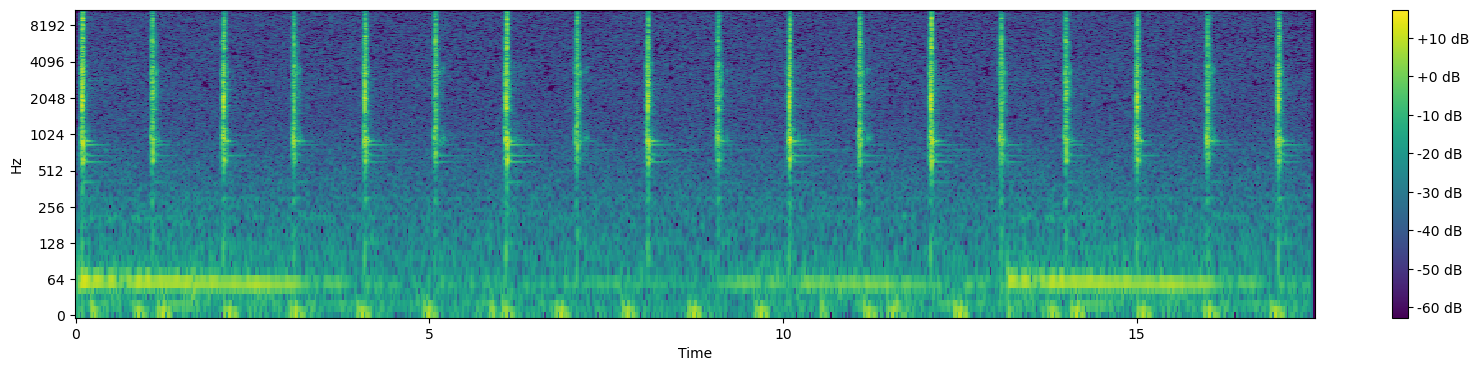

In [20]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.show()

Visualisasi yang dihasilkan menggunakan  spectogram  dari suara bervolume  rendah  menunjukkan bahwa warna grafik lebih gelap dari sampel suara sebelumnya yang cenderung lebih cerah, namun karena ini mengambil suara detk jam, warna saat munculnya suara menjadi sangat konsisten

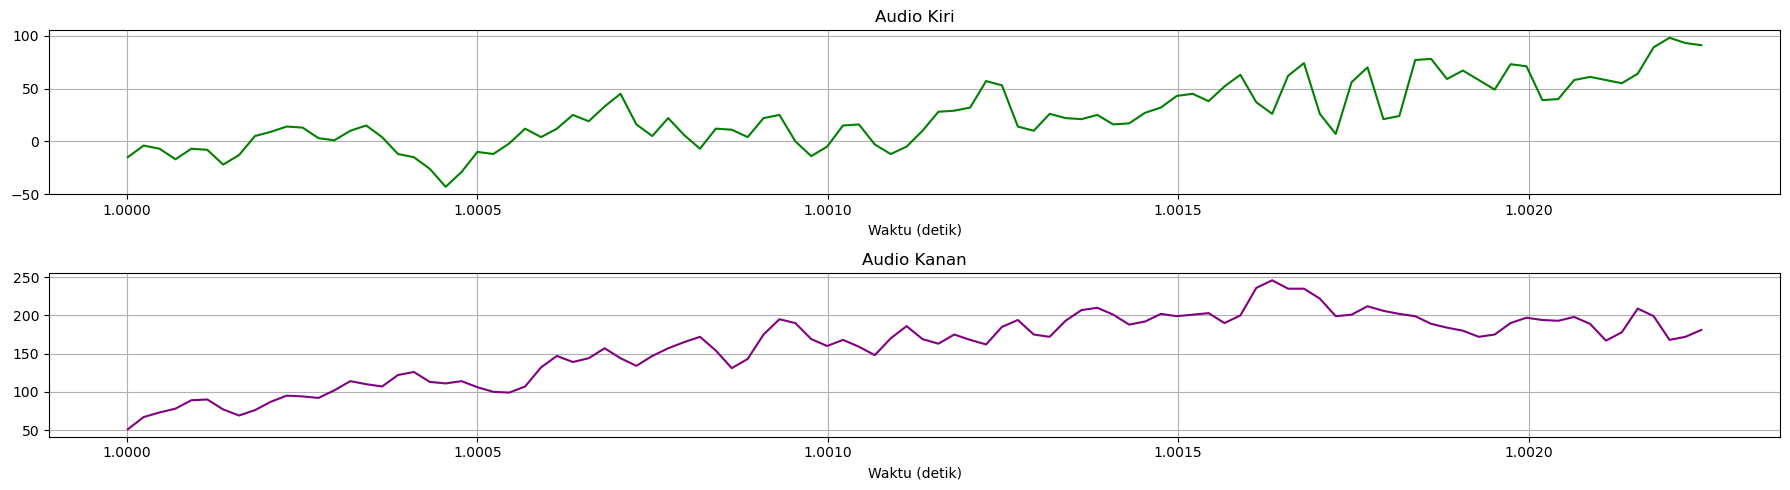

In [21]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time[44100:44200], audio_kiri_data[44100:44200], label='Kiri', color='green')
fig[0].set_title('Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid()
fig[1].plot(sumbu_time[44100:44200], audio_kanan_data[44100:44200], label='Kanan',color='purple')
fig[1].set_title('Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid()
plt.tight_layout()
plt.show()

In [22]:
print(f"Data di dalam audio kiri pada sampel ke 44100-44200: {audio_kiri_data[44100:44200]}")
print(f"Data di dalam audio kanan pada sampel ke 44100-44200: {audio_kanan_data[44100:44200]}")

Data di dalam audio kiri pada sampel ke 44100-44200: [-15  -4  -7 -17  -7  -8 -22 -13   5   9  14  13   3   1  10  15   4 -12
 -15 -26 -43 -29 -10 -12  -2  12   4  12  25  19  33  45  16   5  22   6
  -7  12  11   4  22  25   0 -14  -5  15  16  -3 -12  -5  10  28  29  32
  57  53  14  10  26  22  21  25  16  17  27  32  43  45  38  52  63  37
  26  62  74  26   7  56  70  21  24  77  78  59  67  58  49  73  71  39
  40  58  61  58  55  64  89  98  93  91]
Data di dalam audio kanan pada sampel ke 44100-44200: [ 51  67  73  78  89  90  77  69  76  87  95  94  92 102 114 110 107 122
 126 113 111 114 106 100  99 107 132 147 139 144 157 144 134 147 157 165
 172 154 131 143 175 195 190 169 160 168 159 148 170 186 169 163 175 168
 162 185 194 175 172 193 207 210 201 188 192 202 199 201 203 190 200 236
 246 235 235 222 199 201 212 206 202 199 189 184 180 172 175 190 197 194
 193 198 189 167 178 209 199 168 172 181]


Pengujian Sampel Suara dengan Volume Relatif Tinggi

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

In [24]:
file_jalur = os.path.join(os.getcwd(),'suara_keras.wav')

if not os.path.exists(file_jalur):
    print(f"File {file_jalur} not found.")
    exit()

In [25]:
with wave.open(file_jalur, 'r') as wav_file:
    frem = wav_file.readframes(-1)
    data_suara = np.frombuffer(frem, dtype='int16')
    rate_sampling = wav_file.getframerate()
    
    # informasi channel
    jumlah_channels = wav_file.getnchannels()

In [26]:
print(f"Isi dari data_suara: {data_suara}")
print(f"Panjang dari data_suara: {len(data_suara)}")
print(f"Sampling rate: {rate_sampling}")
print(f"Jumlah channel: {jumlah_channels}")

Isi dari data_suara: [0 0 0 ... 0 0 0]
Panjang dari data_suara: 956416
Sampling rate: 44100
Jumlah channel: 2


In [27]:
data_suara = data_suara.reshape(-1, jumlah_channels)
print(f"Shape dari `sound_data` setelah di reshape: {data_suara.shape}")

audio_kiri_data = data_suara[:, 0]
audio_kanan_data = data_suara[:, 1]

print(f"Panjang Audio Kiri: {len(audio_kiri_data)}")
print(f"Panjang Audio Kanan: {len(audio_kanan_data)}")

Shape dari `sound_data` setelah di reshape: (478208, 2)
Panjang Audio Kiri: 478208
Panjang Audio Kanan: 478208


In [28]:
sampel_panjang_audio = len(audio_kiri_data)
print(f"Panjang Audio Sampel: {sampel_panjang_audio}")

detik_panjang_audio = sampel_panjang_audio / rate_sampling
print(f"Panjang Audio Detik: {detik_panjang_audio}")

# Membuat sumbu waktu
sumbu_time = np.linspace(0, detik_panjang_audio, sampel_panjang_audio)

Panjang Audio Sampel: 478208
Panjang Audio Detik: 10.843718820861678


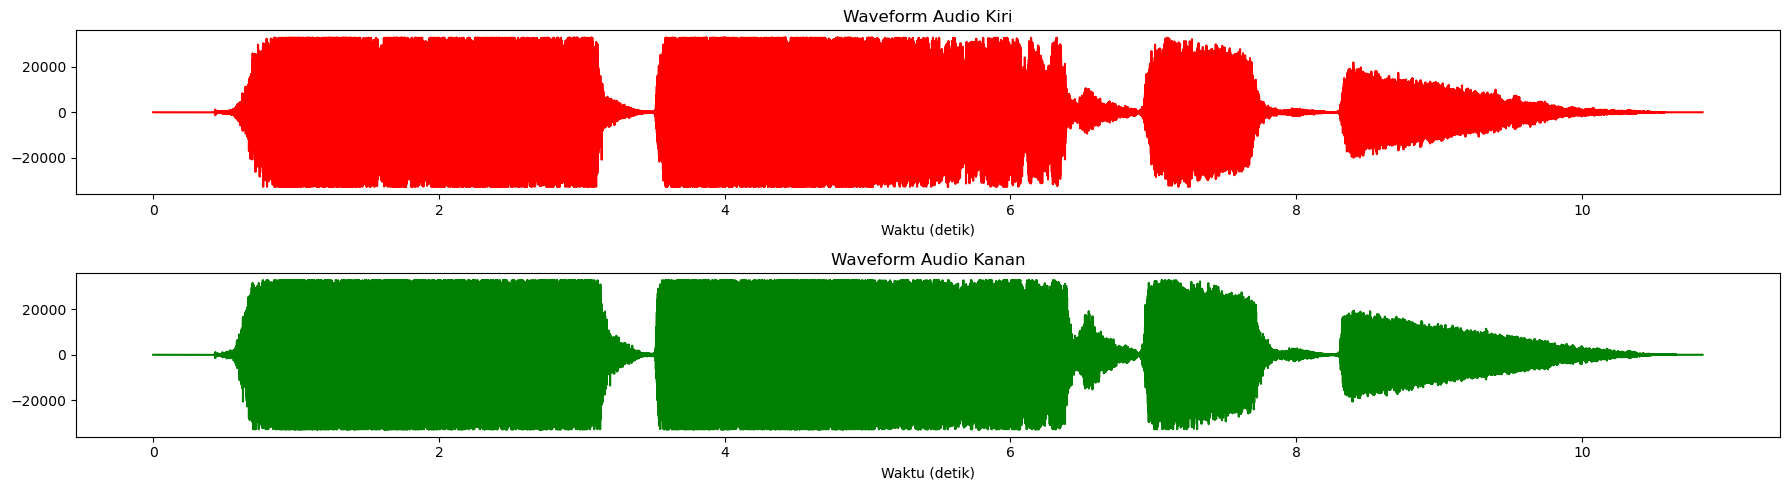

In [29]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time, audio_kiri_data, label='Kiri', color='red')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(sumbu_time, audio_kanan_data, label='Kanan', color= 'green')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Visualisasi yang dihasilkan menggunakan  waveforms  dari suara bervolume  tinggi   menunjukkan bahwa grafik puncak amplitudo yang sangat besar 

In [30]:
data_suara, sr = librosa.load(file_jalur)
S = librosa.stft(data_suara)
S_db = librosa.amplitude_to_db(np.abs(S))
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


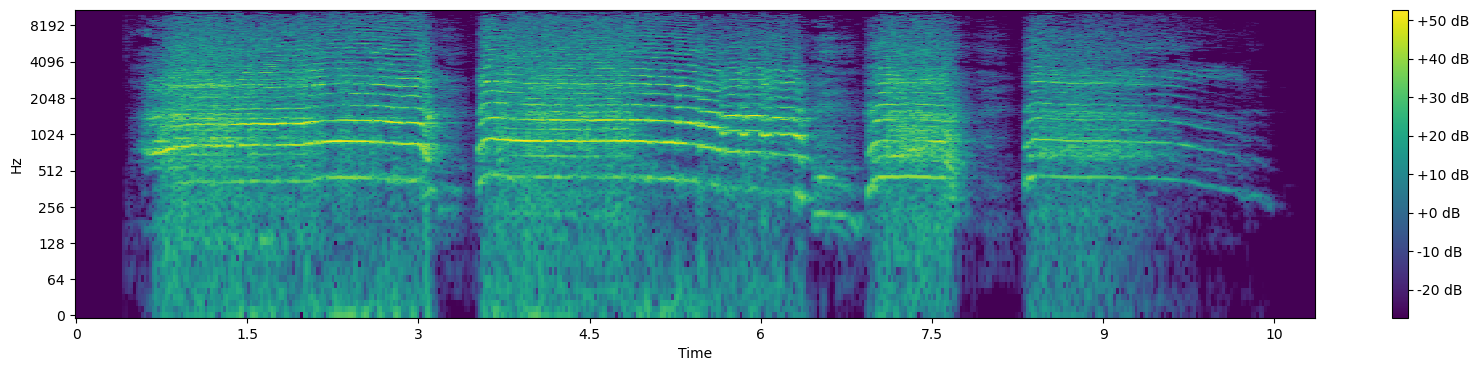

In [31]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.show()

Visualisasi yang dihasilkan menggunakan  spectogram  dari suara bervolume  tinggi menunjukkan bahwa warna grafik penuh dengan munculnya suara

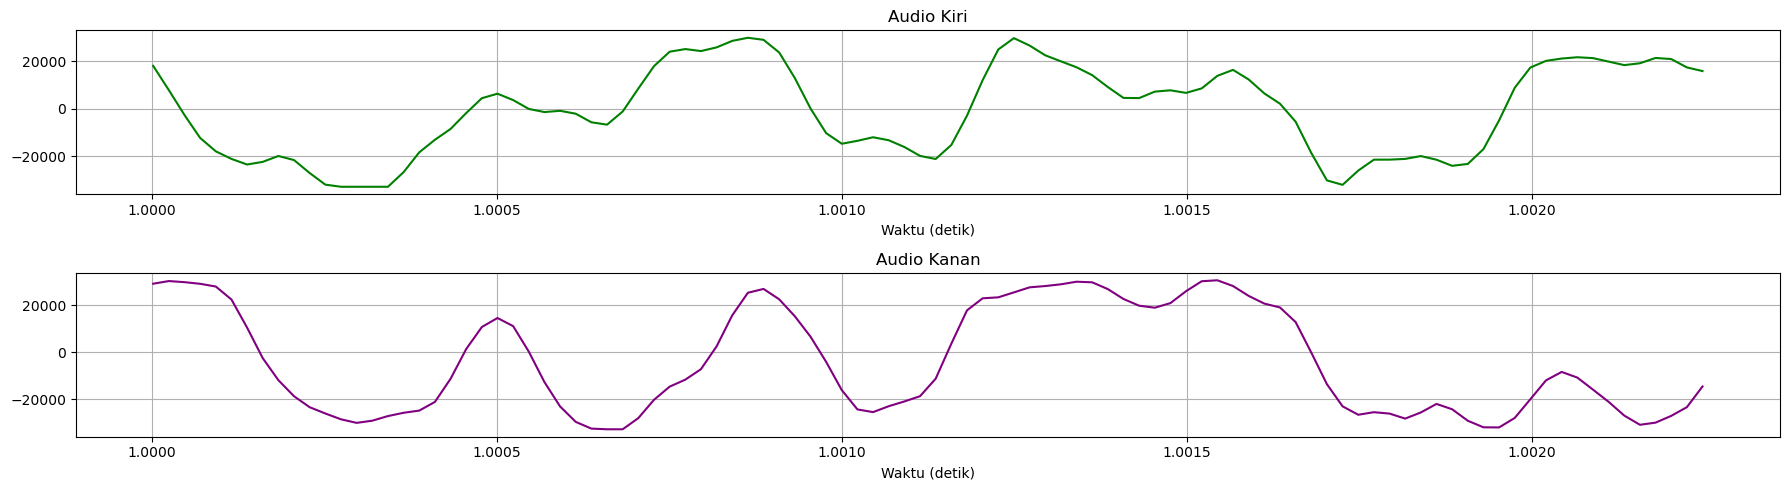

In [32]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time[44100:44200], audio_kiri_data[44100:44200], label='Kiri', color='green')
fig[0].set_title('Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid()
fig[1].plot(sumbu_time[44100:44200], audio_kanan_data[44100:44200], label='Kanan',color='purple')
fig[1].set_title('Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid()
plt.tight_layout()
plt.show()

In [33]:
print(f"Data di dalam audio kiri pada sampel ke 44100-44200: {audio_kiri_data[44100:44200]}")
print(f"Data di dalam audio kanan pada sampel ke 44100-44200: {audio_kanan_data[44100:44200]}")

Data di dalam audio kiri pada sampel ke 44100-44200: [ 18008   7828  -2635 -12259 -17875 -21063 -23418 -22311 -19832 -21555
 -26995 -31874 -32768 -32768 -32768 -32768 -26641 -18309 -13038  -8495
  -1815   4424   6320   3647    -75  -1392   -863  -2086  -5685  -6682
  -1156   8488  17883  23951  25065  24231  25765  28504  29805  28949
  23638  12886    138 -10242 -14697 -13466 -11976 -13230 -16070 -19804
 -21107 -15207  -2910  12004  24905  29652  26543  22450  19920  17422
  14111   9123   4550   4477   7192   7742   6661   8555  13828  16326
  12285   6437   2118  -5439 -18576 -30097 -31952 -25974 -21383 -21369
 -21070 -19868 -21407 -23967 -23180 -16971  -4885   8809  17317  20113
  21086  21630  21271  19798  18318  19108  21332  20869  17363  15825]
Data di dalam audio kanan pada sampel ke 44100-44200: [ 29158  30290  29819  29122  27964  22442  10485  -2510 -11883 -18714
 -23390 -26050 -28532 -30042 -29118 -27152 -25758 -24819 -21142 -11316
   1355  10737  14568  11116    272 -126

Pengujian Sampel Suara desis (essssss)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

In [35]:
file_jalur = os.path.join(os.getcwd(), 'suara_desiss.wav')

if not os.path.exists(file_jalur):
    print(f"File {file_jalur} not found.")
    exit()

In [36]:
with wave.open(file_jalur, 'r') as wav_file:
    frem = wav_file.readframes(-1)
    data_suara = np.frombuffer(frem, dtype='int16')
    rate_sampling = wav_file.getframerate()
    
    # informasi channel
    jumlah_channels = wav_file.getnchannels()

In [37]:
print(f"Isi dari data_suara: {data_suara}")
print(f"Panjang dari data_suara: {len(data_suara)}")
print(f"Sampling rate: {rate_sampling}")
print(f"Jumlah channel: {jumlah_channels}")

Isi dari data_suara: [0 0 0 ... 0 0 0]
Panjang dari data_suara: 5207040
Sampling rate: 44100
Jumlah channel: 2


In [38]:
data_suara = data_suara.reshape(-1, jumlah_channels)
print(f"Shape dari `sound_data` setelah di reshape: {data_suara.shape}")

audio_kiri_data = data_suara[:, 0]
audio_kanan_data = data_suara[:, 1]

print(f"Panjang Audio Kiri: {len(audio_kiri_data)}")
print(f"Panjang Audio Kanan: {len(audio_kanan_data)}")

Shape dari `sound_data` setelah di reshape: (2603520, 2)
Panjang Audio Kiri: 2603520
Panjang Audio Kanan: 2603520


In [39]:
sampel_panjang_audio = len(audio_kiri_data)
print(f"Panjang Audio Sampel: {sampel_panjang_audio}")

detik_panjang_audio = sampel_panjang_audio / rate_sampling
print(f"Panjang Audio Detik: {detik_panjang_audio}")

# Membuat sumbu waktu
sumbu_time = np.linspace(0, detik_panjang_audio, sampel_panjang_audio)

Panjang Audio Sampel: 2603520
Panjang Audio Detik: 59.03673469387755


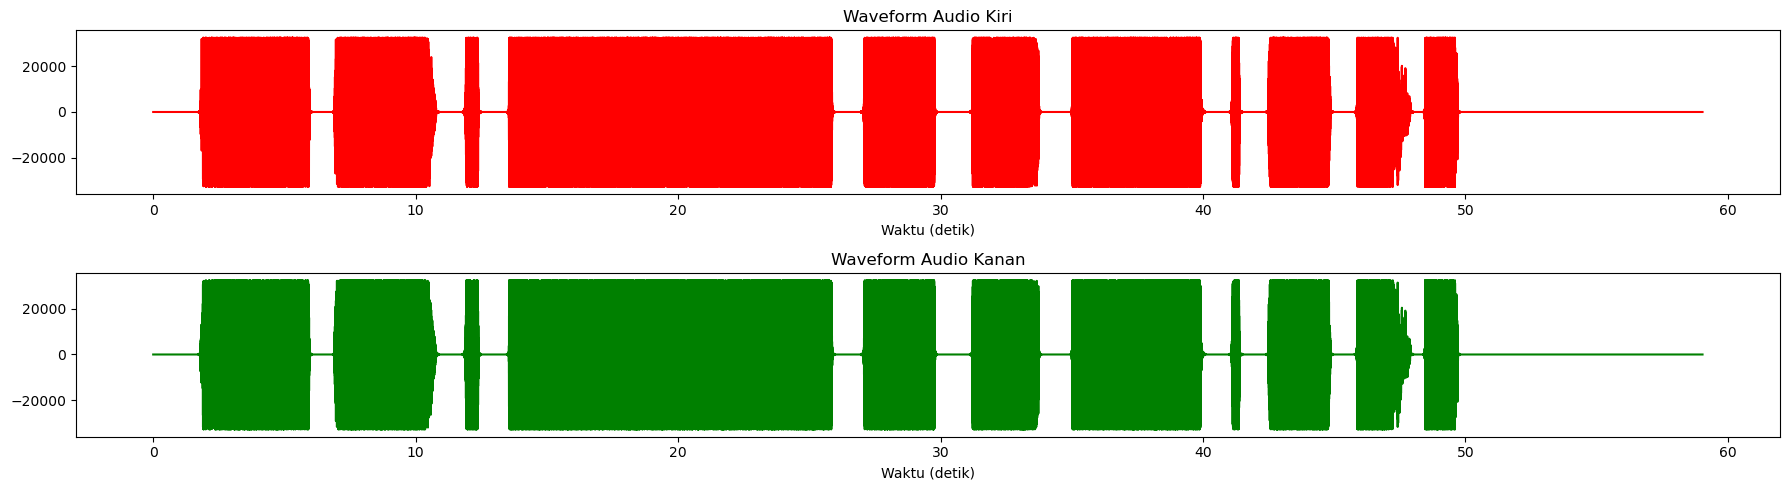

In [40]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time, audio_kiri_data, label='Kiri', color='red')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(sumbu_time, audio_kanan_data, label='Kanan', color= 'green')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Visualisasi yang dihasilkan menggunakan  waveforms  dari suara bervolume  desis   menunjukkan bahwa grafik hanya muncul disaat desis terjadi suara cukup konsisten terbentuk dan panjang  

In [41]:
data_suara, sr = librosa.load(file_jalur)
S = librosa.stft(data_suara)
S_db = librosa.amplitude_to_db(np.abs(S))
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


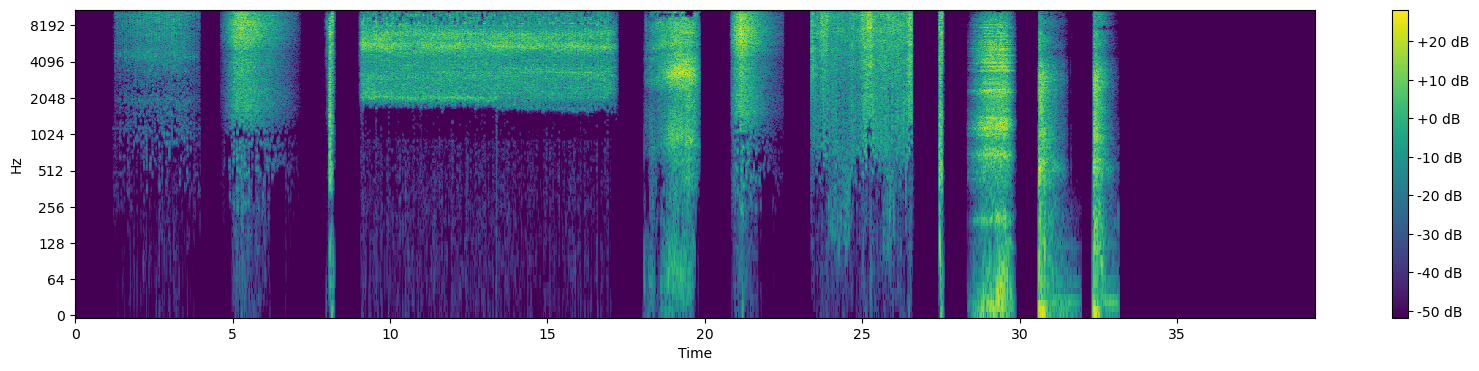

In [42]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.show()

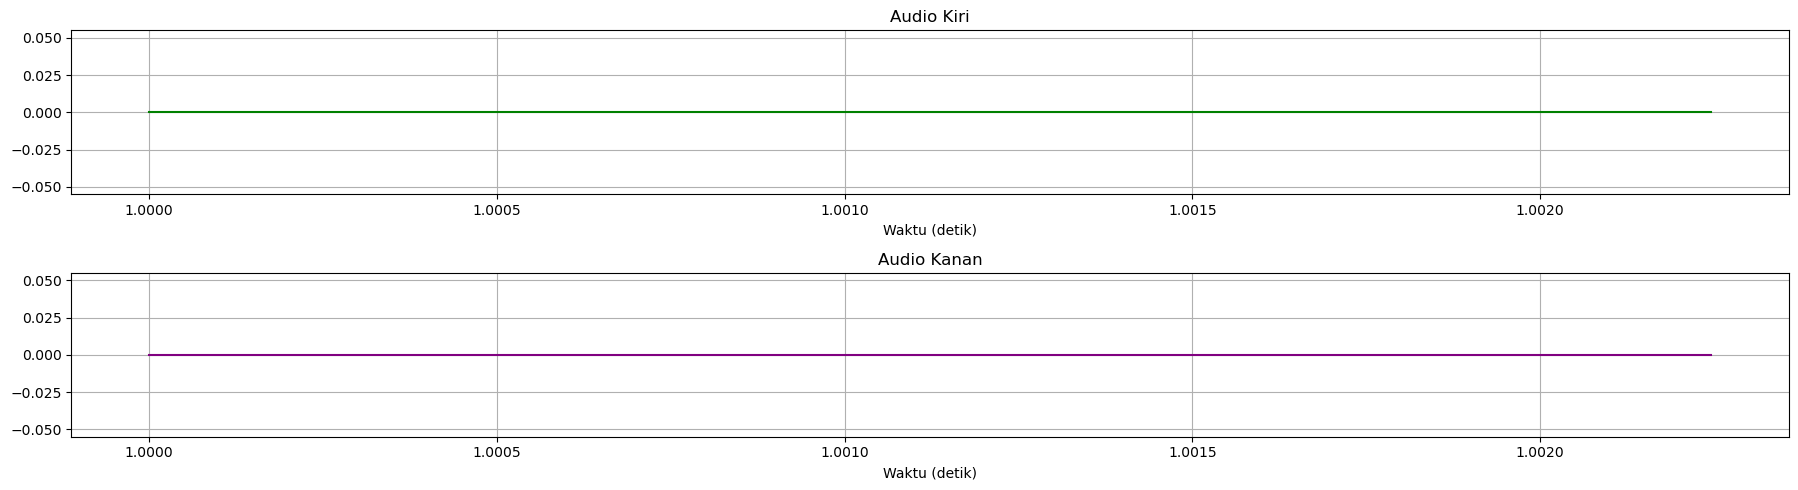

In [43]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time[44100:44200], audio_kiri_data[44100:44200], label='Kiri', color='green')
fig[0].set_title('Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid()
fig[1].plot(sumbu_time[44100:44200], audio_kanan_data[44100:44200], label='Kanan',color='purple')
fig[1].set_title('Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid()
plt.tight_layout()
plt.show()

In [44]:
print(f"Data di dalam audio kiri pada sampel ke 44100-44200: {audio_kiri_data[44100:44200]}")
print(f"Data di dalam audio kanan pada sampel ke 44100-44200: {audio_kanan_data[44100:44200]}")

Data di dalam audio kiri pada sampel ke 44100-44200: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Data di dalam audio kanan pada sampel ke 44100-44200: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Pengujian Sampel Suara (brbrbrbrbr)

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

In [46]:
file_jalur = os.path.join(os.getcwd(), 'suara_mber.wav')

if not os.path.exists(file_jalur):
    print(f"File {file_jalur} not found.")
    exit()

In [47]:
with wave.open(file_jalur, 'r') as wav_file:
    frem = wav_file.readframes(-1)
    data_suara = np.frombuffer(frem, dtype='int16')
    rate_sampling = wav_file.getframerate()
    
    # informasi channel
    jumlah_channels = wav_file.getnchannels()

In [48]:
print(f"Isi dari data_suara: {data_suara}")
print(f"Panjang dari data_suara: {len(data_suara)}")
print(f"Sampling rate: {rate_sampling}")
print(f"Jumlah channel: {jumlah_channels}")

Isi dari data_suara: [0 0 0 ... 0 0 0]
Panjang dari data_suara: 503808
Sampling rate: 44100
Jumlah channel: 2


In [49]:
data_suara = data_suara.reshape(-1, jumlah_channels)
print(f"Shape dari `sound_data` setelah di reshape: {data_suara.shape}")

audio_kiri_data = data_suara[:, 0]
audio_kanan_data = data_suara[:, 1]

print(f"Panjang Audio Kiri: {len(audio_kiri_data)}")
print(f"Panjang Audio Kanan: {len(audio_kanan_data)}")

Shape dari `sound_data` setelah di reshape: (251904, 2)
Panjang Audio Kiri: 251904
Panjang Audio Kanan: 251904


In [50]:
sampel_panjang_audio = len(audio_kiri_data)
print(f"Panjang Audio Sampel: {sampel_panjang_audio}")

detik_panjang_audio = sampel_panjang_audio / rate_sampling
print(f"Panjang Audio Detik: {detik_panjang_audio}")

# Membuat sumbu waktu
sumbu_time = np.linspace(0, detik_panjang_audio, sampel_panjang_audio)

Panjang Audio Sampel: 251904
Panjang Audio Detik: 5.712108843537415


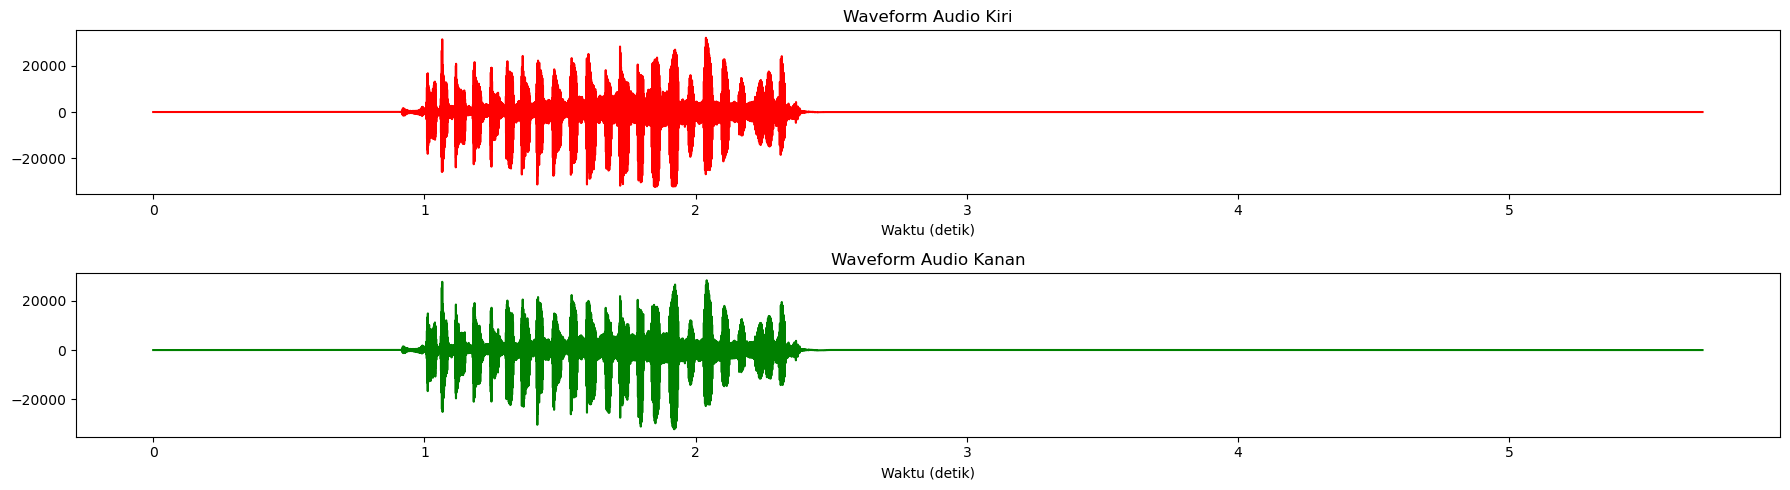

In [51]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time, audio_kiri_data, label='Kiri', color='red')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(sumbu_time, audio_kanan_data, label='Kanan', color= 'green')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

 

 


Visualisasi yang dihasilkan menggunakan  waveforms  dari suara bervolume brbrbrbr  menunjukkan bahwa grafik hanya muncul disaat terjadi suara dan polanya tidak beraturan 



In [52]:
data_suara, sr = librosa.load(file_jalur)
S = librosa.stft(data_suara)
S_db = librosa.amplitude_to_db(np.abs(S))
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


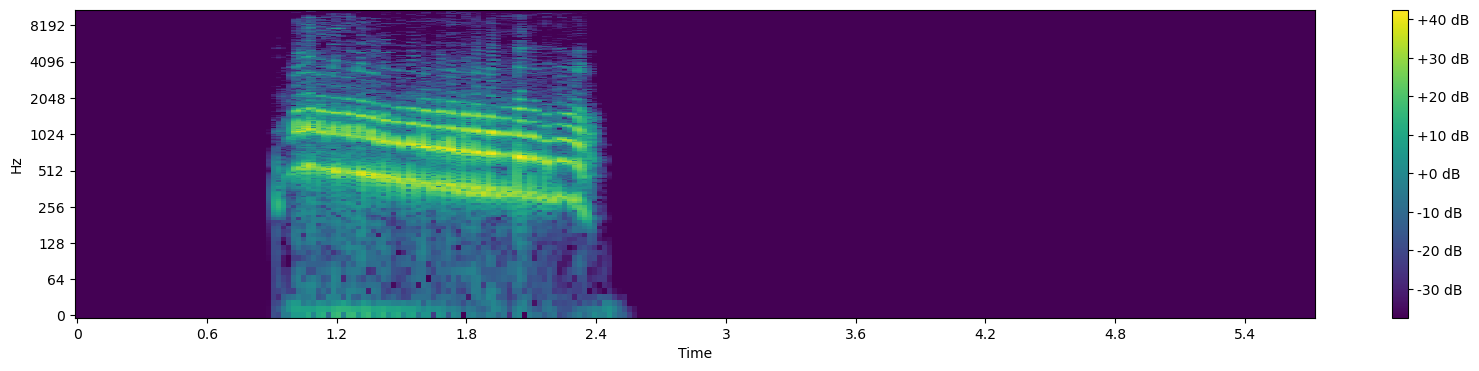

In [53]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.show()

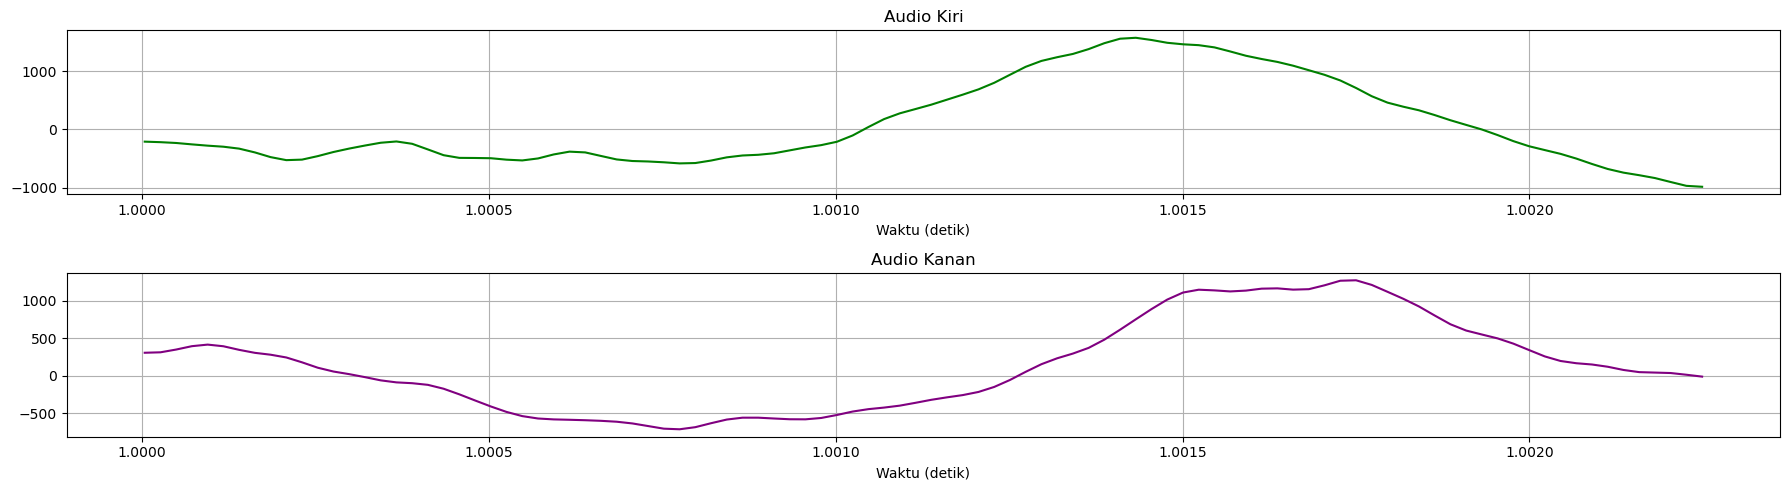

In [54]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(sumbu_time[44100:44200], audio_kiri_data[44100:44200], label='Kiri', color='green')
fig[0].set_title('Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid()
fig[1].plot(sumbu_time[44100:44200], audio_kanan_data[44100:44200], label='Kanan',color='purple')
fig[1].set_title('Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid()
plt.tight_layout()
plt.show()

In [55]:
print(f"Data di dalam audio kiri pada sampel ke 44100-44200: {audio_kiri_data[44100:44200]}")
print(f"Data di dalam audio kanan pada sampel ke 44100-44200: {audio_kanan_data[44100:44200]}")

Data di dalam audio kiri pada sampel ke 44100-44200: [-209 -218 -232 -256 -278 -296 -329 -394 -475 -527 -518 -458 -387 -328
 -276 -228 -206 -246 -343 -442 -488 -490 -494 -519 -532 -498 -429 -381
 -394 -455 -515 -542 -550 -564 -583 -577 -534 -479 -447 -435 -409 -359
 -309 -269 -211 -103   42  179  278  352  427  513  599  690  803  941
 1078 1179 1243 1299 1382 1484 1561 1577 1539 1491 1465 1450 1412 1342
 1268 1212 1162 1097 1019  940  843  714  572  462  392  330  248  159
   79    0  -96 -200 -288 -354 -419 -500 -593 -679 -742 -786 -835 -903
 -969 -985]
Data di dalam audio kanan pada sampel ke 44100-44200: [ 307  313  350  395  416  394  346  306  281  244  179  107   56   21
  -19  -62  -89 -100 -122 -174 -249 -331 -411 -484 -540 -572 -584 -589
 -595 -603 -615 -638 -673 -708 -716 -688 -635 -586 -561 -561 -572 -582
 -583 -565 -525 -479 -447 -426 -400 -362 -322 -289 -259 -217 -150  -57
   52  154  233  296  372  482  615  754  891 1018 1112 1150 1141 1127
 1138 1164 1168 1151 1157 120

Berdasarkan hasil visualisasi dan analisis dari lima sampel suara dengan volume yang berbeda menggunakan waveform dan spektogram, dapat disimpulkan:

- Suara dengan volume rendah cenderung memiliki amplitudo dengan puncak atau lembah gelombang yang mendekati nol, sedangkan suara dengan volume lebih tinggi cenderung memiliki amplitudo dengan puncak atau lembah yang jauh dari nol.
- Pada spectogram, suara dengan volume rendah cenderung berwarna gelap, sedangkan suara dengan volume tinggi menunjukkan warna cerah dan intens, yang menandakan lebih banyak energi di berbagai frekuensi.
- Suara dengan volume sedang dan kata berakhiran "s" panjang akan menunjukkan pola gelombang yang lebih halus tanpa fluktuasi besar, sementara kata "brrbrbrbrb" (Lip Trill) akan menunjukkan pola gelombang yang berfluktuasi besar dan tidak teratur.

Soal Nomor 2:
Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
  Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
   Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
 
   Lakukan fading untuk bagian awal dan akhir dari audio


Awalnya, saya bertanya kepada ChatGPT tentang "cara membuat teknik fading yang non-linear." Karena digit terakhir NIM saya ganjil, saya meminta penjelasan terkait teknik **Logarithmic Scale Fading** serta penerapannya menggunakan **library wave**. Hasil percakapan dengan ChatGPT telah saya sertakan di akhir catatan ini dengan outline mengenai langkah-langkah penerapan **Logarithmic Scale Fading**.

In [56]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave

data_type = np.int16 # array NumPy bertipe int16
figure_size = (25, 7) # ukuran figure
fig_linestyle = "-" # gaya garis
fig_linewidth = 1 # ketebalan garis
specto_format = '%+2.0f dB' # format spektogram


In [57]:
file_jalur = os.path.join(os.getcwd(), 'ImperialMarch60.wav')

# check apakah file ada
if not os.path.exists(file_jalur):
    print('File tidak ditemukan')

In [58]:
with wave.open(file_jalur, 'r') as file_wav:
    jumlah_channels = file_wav.getnchannels()
    lebar_sample = file_wav.getsampwidth()
    frek = file_wav.getframerate()
    jumlah_samples = file_wav.getnframes()
    
    konten_audio = file_wav.readframes(jumlah_samples)
    data_suara = np.frombuffer(konten_audio, dtype=np.int16)
    
if jumlah_channels > 1:
 data_suara = data_suara.reshape(-1, jumlah_channels)

Audio dipotong dari durasi 0 hingga 45 detik, karena setelah mendengarkan, bagian audio antara 46 hingga 60 detik memiliki amplitudo yang sangat rendah.

In [59]:
mulai_trimmed_waktu = 0
akhir_trimmed_waktu = 45
mulai_sample_suara = int(mulai_trimmed_waktu * frek)
akhir_sample_audio = int(akhir_trimmed_waktu * frek)
trimmed_audio_data = data_suara[mulai_sample_suara:akhir_sample_audio]

In [60]:
file_jalur_trimmed_suara = os.path.join(os.getcwd(),'ImperialMarch60-trimmed.wav')
with wave.open(file_jalur_trimmed_suara, 'w') as file_wav:
 file_wav.setnchannels(jumlah_channels)
 file_wav.setsampwidth(lebar_sample)
 file_wav.setnframes(len(trimmed_audio_data))
 file_wav.setframerate(frek)
 file_wav.writeframes(trimmed_audio_data.tobytes())


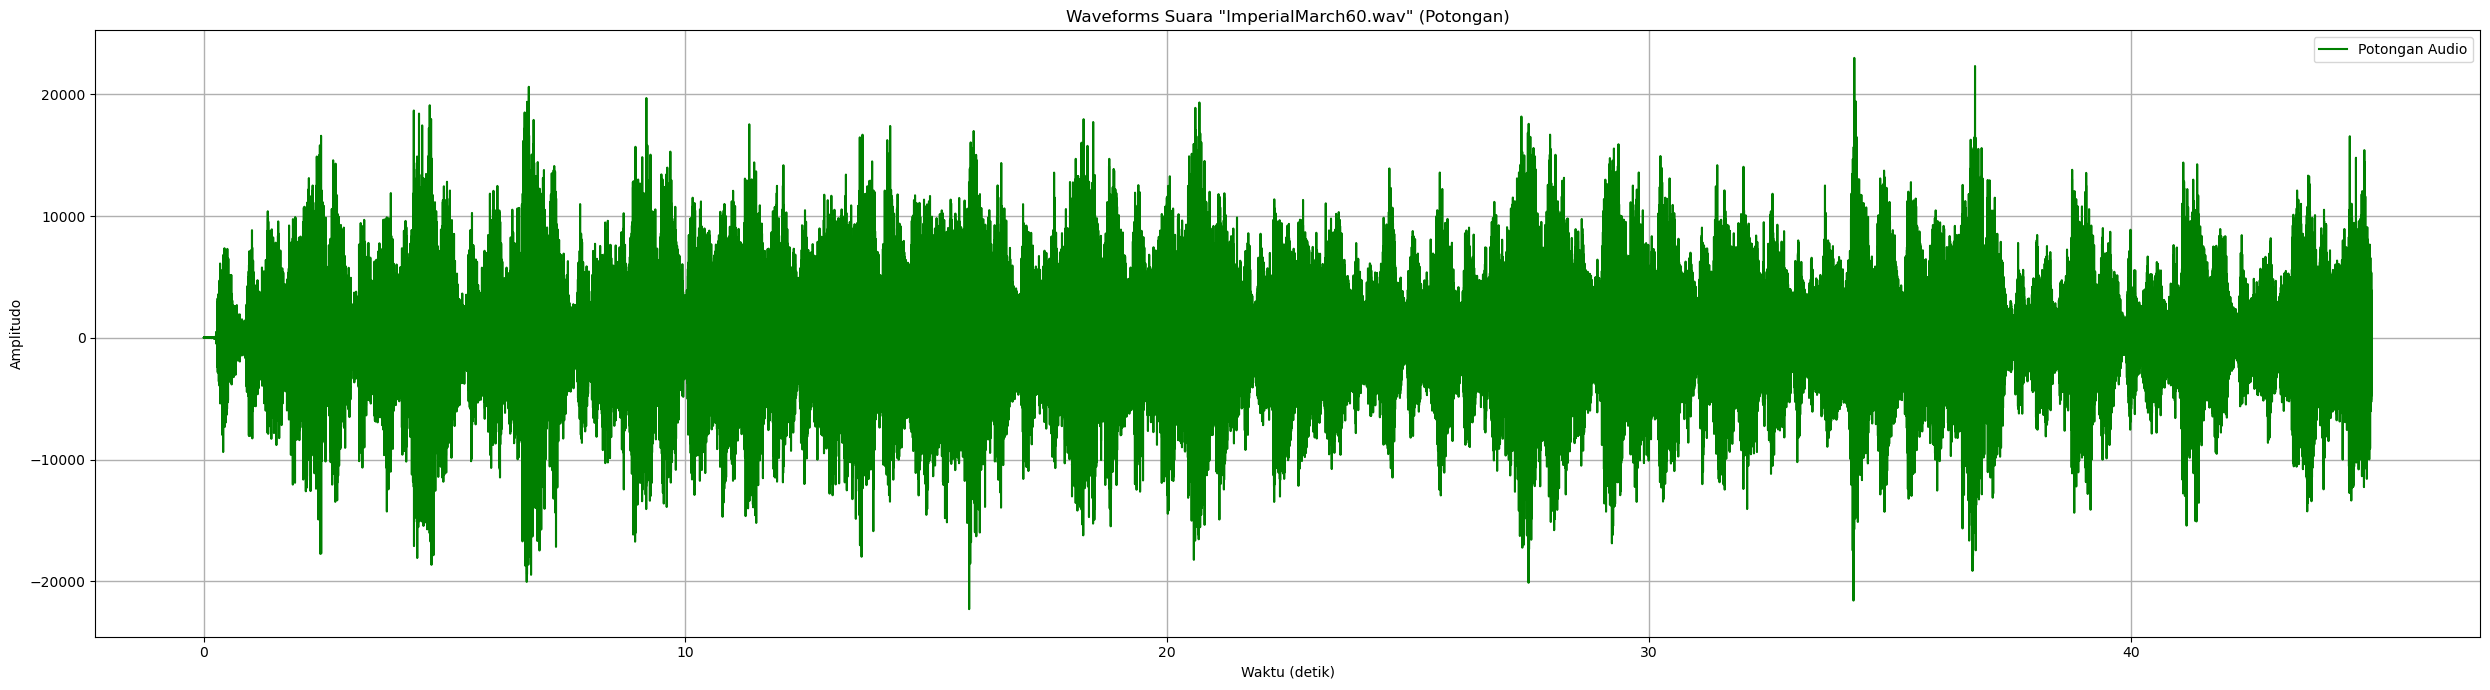

In [61]:
sumbu_trimmed_waktu = np.linspace(mulai_trimmed_waktu, akhir_trimmed_waktu, num=len(trimmed_audio_data))
plt.figure(figsize=figure_size)
plt.plot(sumbu_trimmed_waktu, trimmed_audio_data, color='green', label='Potongan Audio')
plt.title('Waveforms Suara "ImperialMarch60.wav" (Potongan)')
plt.ylabel('Amplitudo')
plt.xlabel('Waktu (detik)')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


memuat potongan suara

In [62]:
file_jalur = os.path.join(os.getcwd(), 'ImperialMarch60-trimmed.wav')
if not os.path.exists(file_jalur):
 print('File tidak ditemukan')
 exit()
# Memuat file audio menjadi beberapa variabel data
with wave.open(file_jalur, 'r') as file_wav:
 frek = file_wav.getnframes() 
 jumlah_channels = file_wav.getnchannels()
 frek = file_wav.getframerate()
 lebar_sample = file_wav.getsampwidth()
 data_suara = np.frombuffer(file_wav.readframes(jumlah_samples), dtype=data_type)
 # Reshape audio data jika jumlah channel lebih dari 1
if jumlah_channels > 1:
 data_suara = data_suara.reshape(-1, jumlah_channels)

In [63]:
fade_in_duration = 11.0
fade_out_duration = 4.0
sample_fade_in_duration = int(fade_in_duration * frek)
sample_fade_out_duration = int(fade_out_duration * frek)


Membuat Kurva Non-Linear dengan Menerapkan Rumus dari ChatGPT

In [64]:
# Konstanta yang mengontrol kecepatan fading
k = 10
# Fading in
panjang_suara = len(data_suara)
fade_in_time_axis = np.linspace(0, sample_fade_in_duration, panjang_suara)
fade_in_curve = np.log(1 + k * fade_in_time_axis) / np.log(1 + k * sample_fade_in_duration)
# Fading out
panjang_suara = len(data_suara)
fade_out_time_axis = np.linspace(0, sample_fade_out_duration, panjang_suara)
fade_out_curve = 1 - np.log(1 + k * fade_out_time_axis) / np.log(1 + k * sample_fade_out_duration)

menampilkan curva

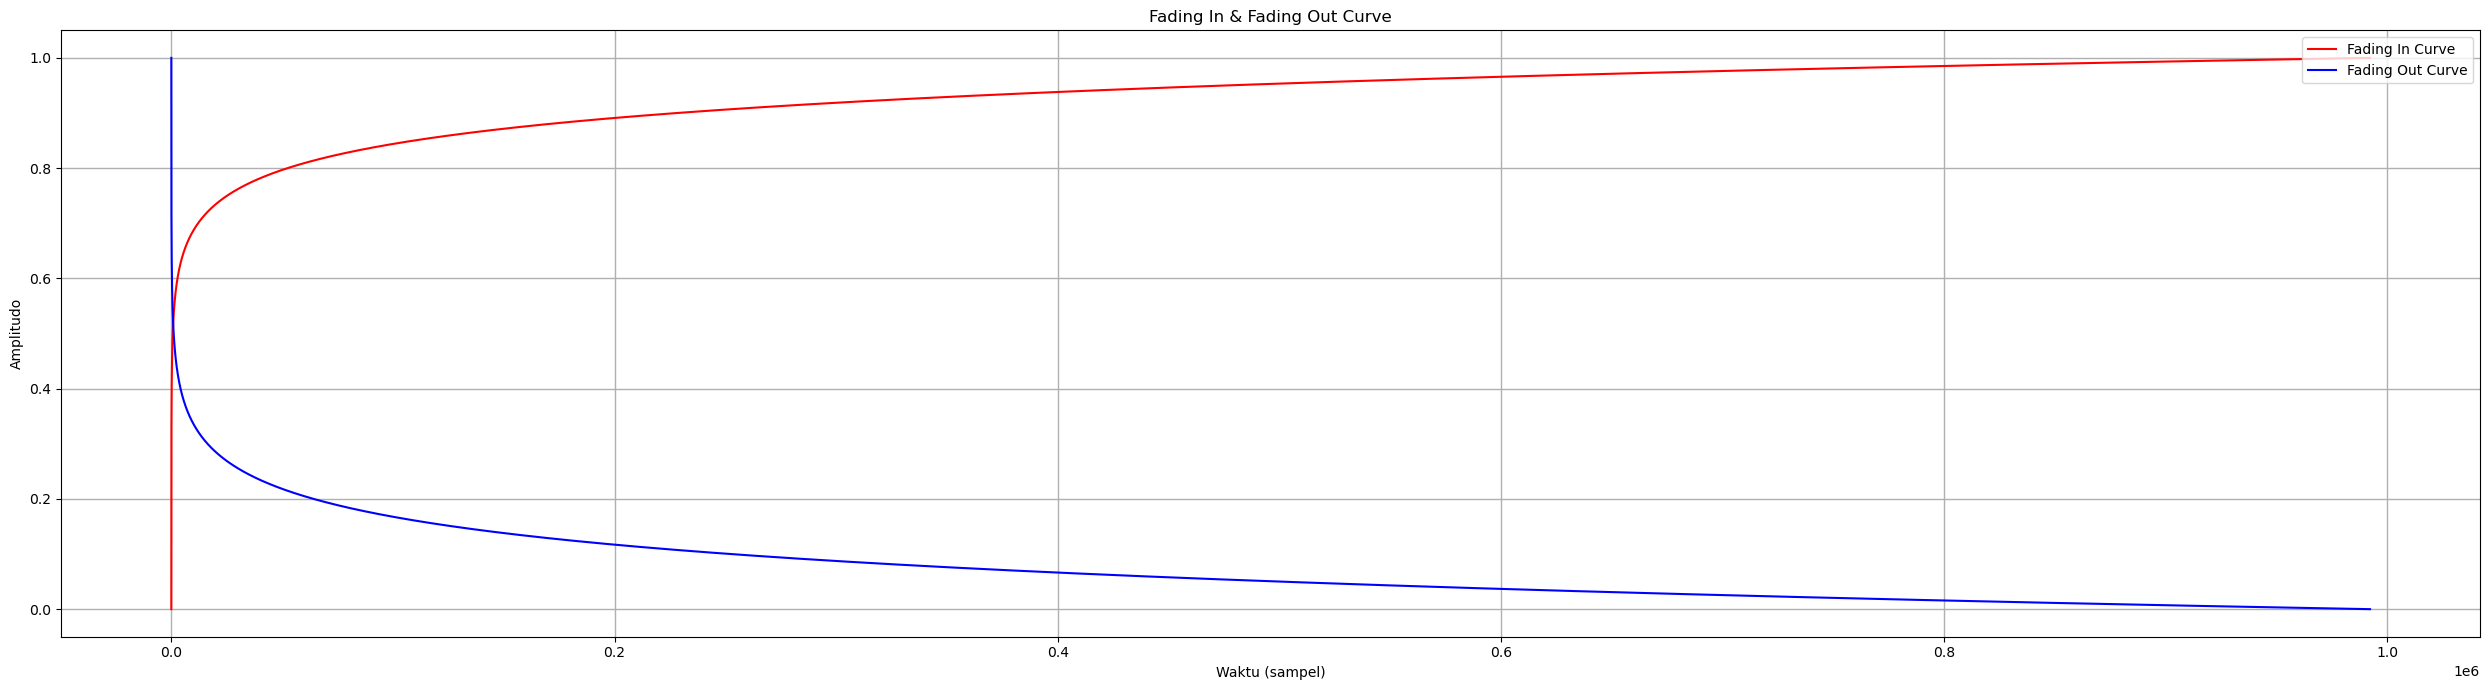

In [65]:
plt.figure(figsize=figure_size)
plt.plot(fade_in_curve, color='red', label='Fading In Curve')
plt.plot(fade_out_curve, color='blue', label='Fading Out Curve')
plt.title('Fading In & Fading Out Curve')
plt.ylabel('Amplitudo')
plt.xlabel('Waktu (sampel)')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


menampilkan hasil setelah dilakukan fading

In [66]:
copy_data_suara = data_suara.copy()
copy_data_suara[:sample_fade_in_duration] = copy_data_suara[:sample_fade_in_duration]
copy_data_suara[-sample_fade_out_duration:] = copy_data_suara[-sample_fade_out_duration]

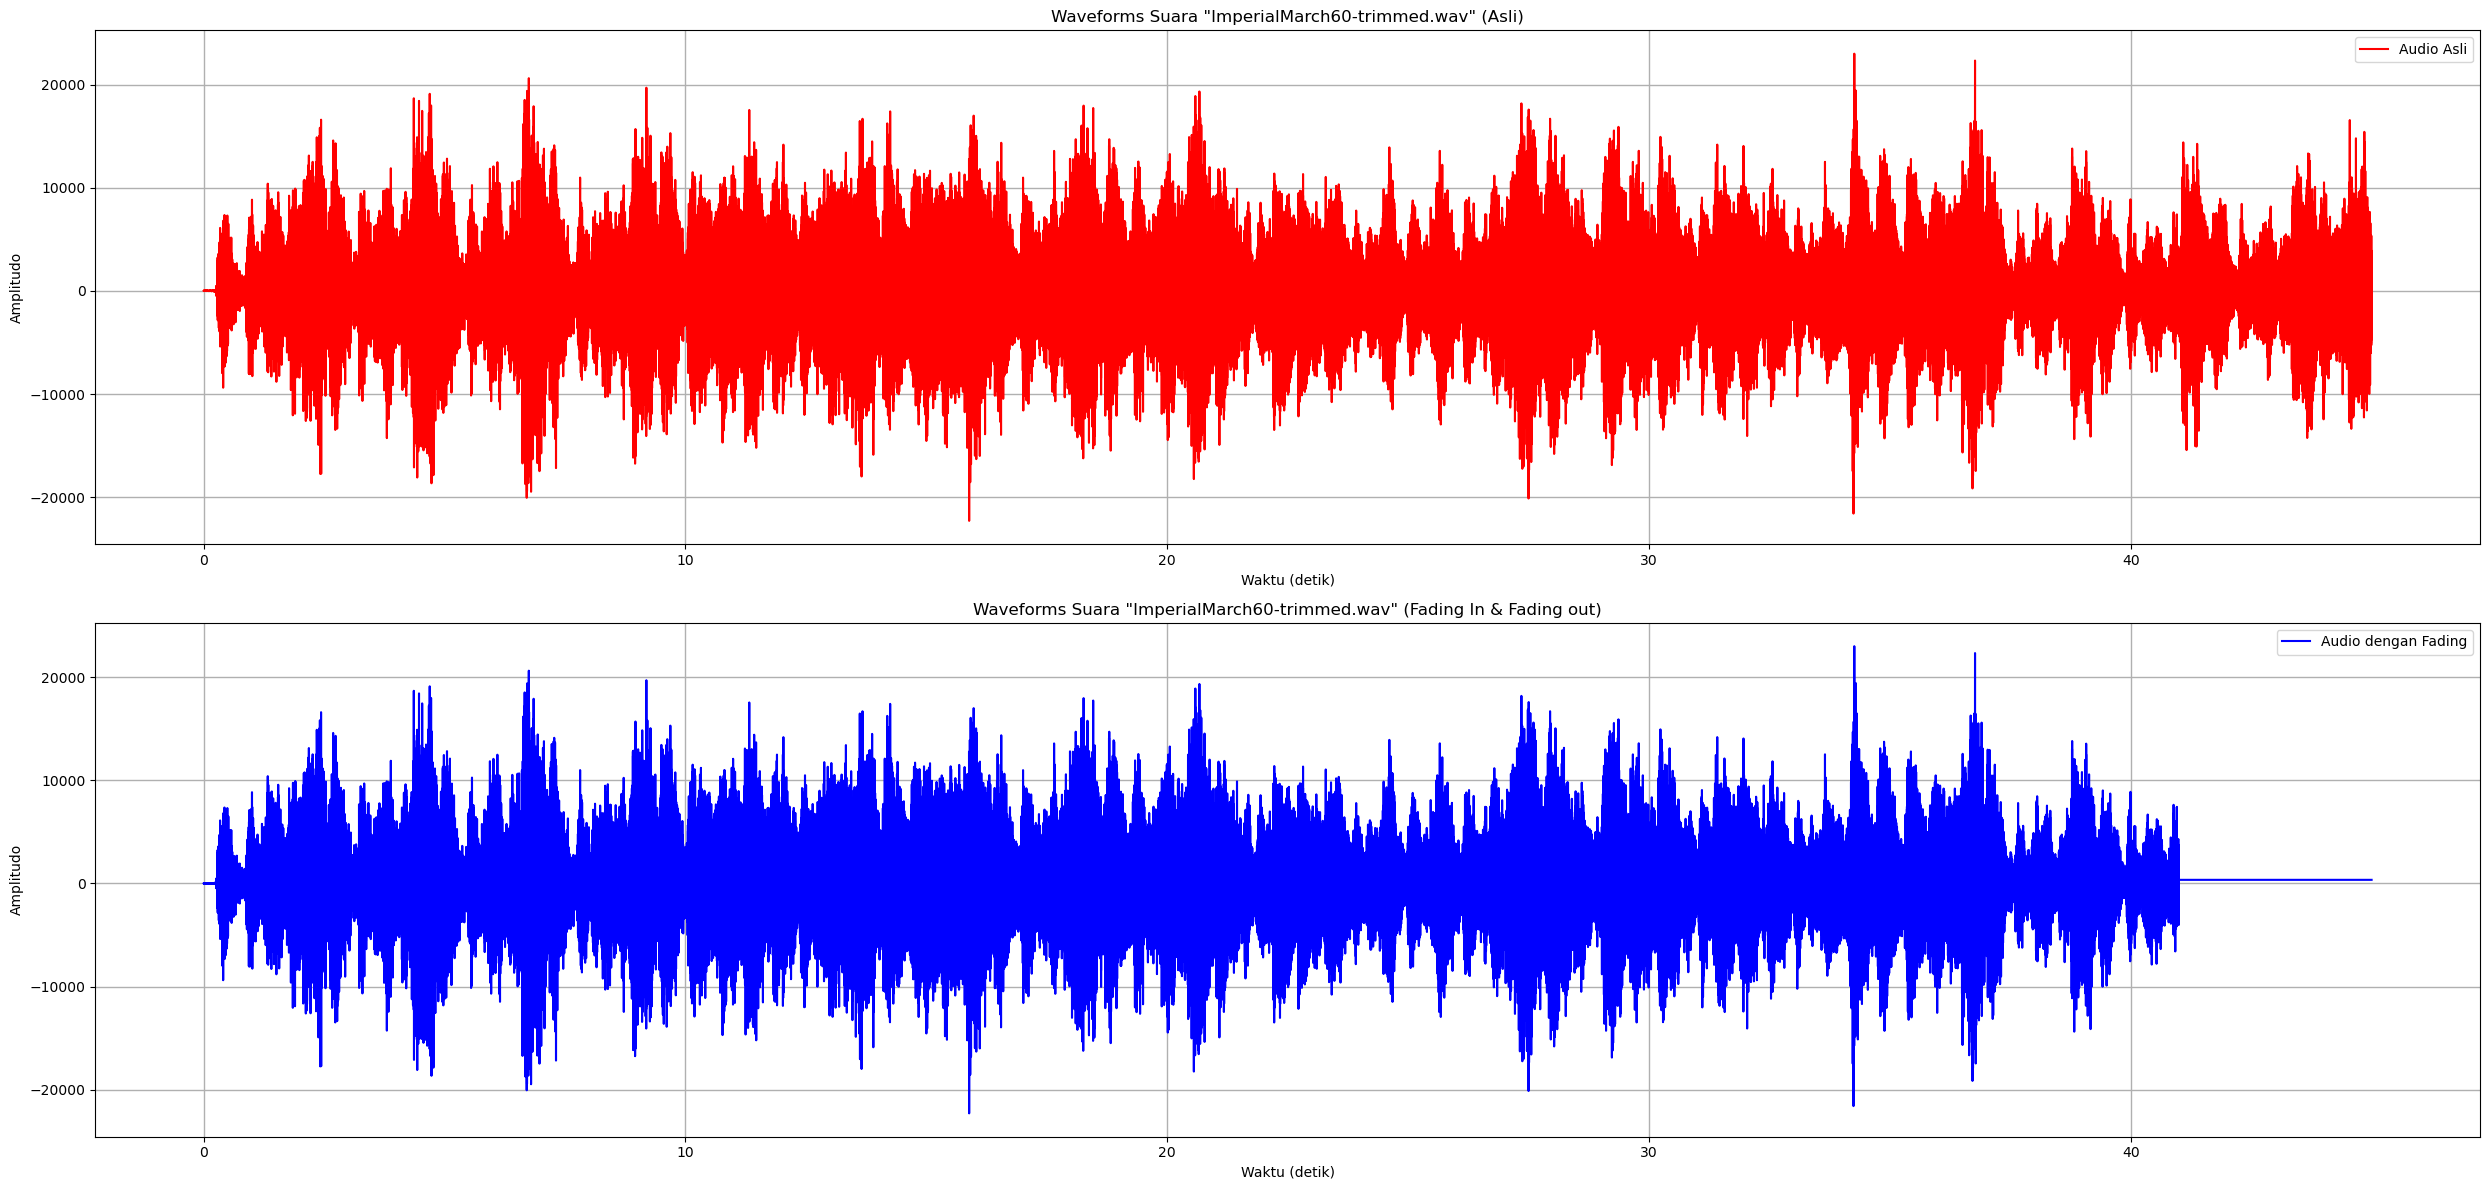

In [67]:
sumbu_time = np.linspace(0, len(data_suara) / frek, num=len(data_suara))
ax, fig = plt.subplots(2, 1, figsize=(25, 12))
fig[0].plot(sumbu_time, data_suara, color='red', label='Audio Asli')
fig[0].set_title('Waveforms Suara "ImperialMarch60-trimmed.wav" (Asli)')
fig[0].set_ylabel('Amplitudo')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
fig[0].legend(loc='upper right')
fig[1].plot(sumbu_time, copy_data_suara, color='blue', label='Audio dengan Fading')
fig[1].set_title('Waveforms Suara "ImperialMarch60-trimmed.wav" (Fading In & Fading out)')
fig[1].set_ylabel('Amplitudo')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
fig[1].legend(loc='upper right')
plt.tight_layout()
plt.show()


In [68]:
jalur_suara_faded_keluaran = os.path.join(os.getcwd(), 'data', 'ImperialMarch60-fading.wav')
os.makedirs(os.path.dirname(jalur_suara_faded_keluaran), exist_ok=True)
with wave.open(jalur_suara_faded_keluaran, 'w') as file_wav:
 file_wav.setnchannels(jumlah_channels)
 file_wav.setsampwidth(lebar_sample)
 file_wav.setframerate(frek)
 file_wav.writeframes(copy_data_suara.tobytes())


Soal Nomor 3:
Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS. Berikan penjelasan langkah-langkah yang anda lakukan untuk menyelesaikan tugas ini


In [69]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave

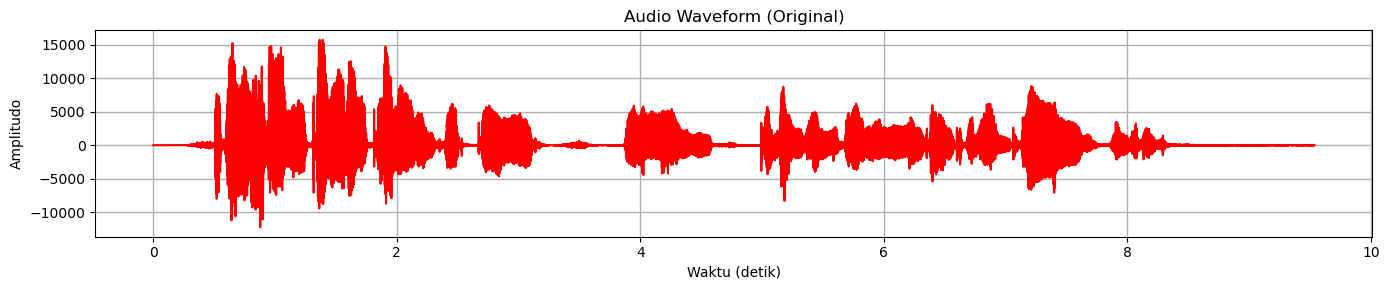

In [70]:
# Cari path file audio
file_jalur = os.path.join(os.getcwd(), 'suara_gagal.wav')
# Cek jika file tidak ada
if not os.path.exists(file_jalur):
 print('File tidak ditemukan')
 exit()
# Memuat file audio menjadi beberapa variabel data
with wave.open(file_jalur, 'r') as file_wav:
 jumlah_samples = file_wav.getnframes()
 jumlah_channels = file_wav.getnchannels()
 frek = file_wav.getframerate()
 lebar_sample = file_wav.getsampwidth()
 data_suara = np.frombuffer(file_wav.readframes(jumlah_samples), dtype=data_type)
 # Reshape audio data jika jumlah channel lebih dari 1
if jumlah_channels > 1:
 data_suara = data_suara.reshape(-1, jumlah_channels)
sumbu_time = np.linspace(0, jumlah_samples/frek, jumlah_samples)
plt.figure(figsize=(14, 3))
plt.plot(sumbu_time, data_suara, color="red")
plt.title('Audio Waveform (Original)')
plt.ylabel('Amplitudo')
plt.xlabel('Waktu (detik)')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.tight_layout()
plt.show()

In [71]:
b = np.array([1.53512485958697, -2.69169618940638, 1.19839281085285])
a = np.array([1.0, -1.69065929318241, 0.73248077421585])


kompresi suara

In [72]:
nilai_max_suara = np.max(np.abs(data_suara))
print(f'Maksimum nilai amplitudo audio: {nilai_max_suara}')

Maksimum nilai amplitudo audio: 15728


In [73]:
float_data_suara = data_suara.astype(np.float32) / 32767.0

In [74]:
saringan_suara = np.zeros_like(float_data_suara)

for i in range(len(float_data_suara)):
    if i < 2:
        # Jika i kurang dari 2, tidak bisa menggunakan filter (terlalu sedikit data), salin data aslinya
        saringan_suara[i] = float_data_suara[i]
    else:
        # Aplikasi filter IIR menggunakan koefisien b dan a
        saringan_suara[i] = (b[0] * float_data_suara[i] + 
                             b[1] * float_data_suara[i-1] + 
                             b[2] * float_data_suara[i-2] - 
                             a[1] * saringan_suara[i-1] - 
                             a[2] * saringan_suara[i-2])


In [75]:
mean_square_suara = np.mean(np.square(float_data_suara))
print(f'Mean Square Audio Asli: {mean_square_suara:.5f}')

Mean Square Audio Asli: 0.00252


In [76]:
rumus_lufs = -0.691 + 10 * np.log10(mean_square_suara)
print(f'LUFS Audio Asli: {rumus_lufs:.5f}')

LUFS Audio Asli: -26.68484


In [77]:
nilai_max_suara = np.max(np.abs(data_suara))
batas_suara = 0.4 * nilai_max_suara
print(f"Nilai maksimum audio: {nilai_max_suara:.3f}")
print(f"Threshold audio: {batas_suara:.3f}")


Nilai maksimum audio: 15728.000
Threshold audio: 6291.200


In [78]:
compressed_data_suara = data_suara.copy()

In [79]:
compressed_mask_suara = np.abs(compressed_data_suara) > batas_suara
print(f"Mask audio terkompresi: {compressed_mask_suara}")
print(f"Jumlah data audio yang terkompresi: {np.sum(compressed_mask_suara)}")

Mask audio terkompresi: [False False False ... False False False]
Jumlah data audio yang terkompresi: 3576


In [80]:
skala_ratio = 6

# Terapkan kompresi pada data audio yang memenuhi syarat di 'compressed_audio_mask'
compressed_data_suara[compressed_mask_suara] = batas_suara + (
    np.abs(compressed_data_suara[compressed_mask_suara]) - batas_suara
) / skala_ratio * np.sign(compressed_data_suara[compressed_mask_suara])

# Pastikan data audio terkompresi tidak melebihi batas nilai maksimum/minimum
compressed_audio_data = np.clip(compressed_data_suara, -nilai_max_suara, nilai_max_suara)


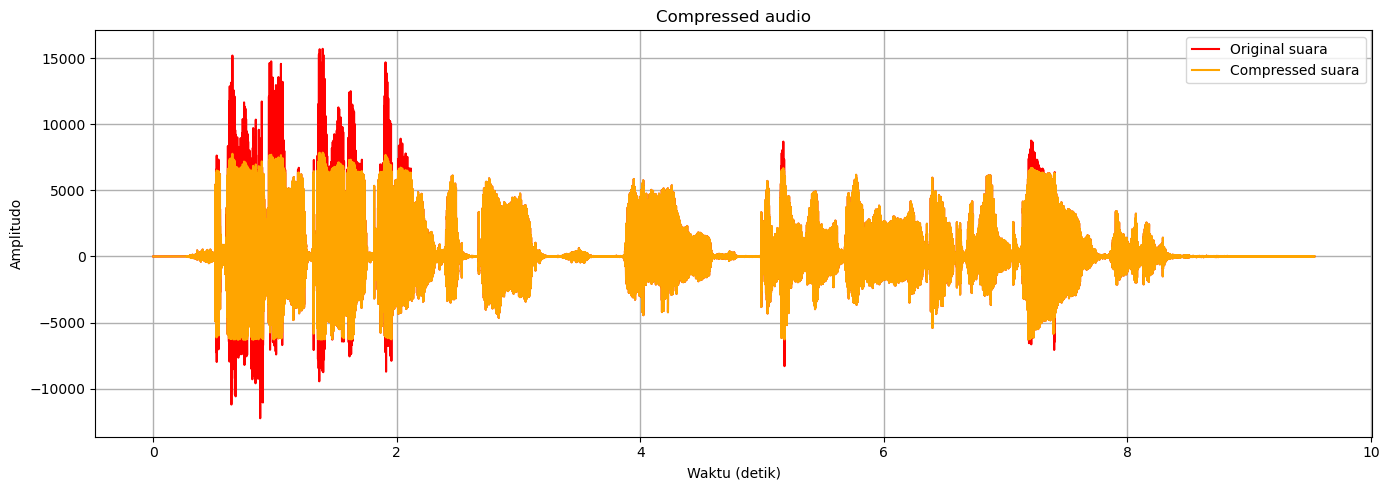

In [81]:
sumbu_time = np.linspace(0, jumlah_samples / frek, jumlah_samples)
plt.figure(figsize=(14, 5))
plt.plot(sumbu_time, data_suara, color='red', label='Original suara')
plt.plot(sumbu_time, compressed_data_suara, color='orange', label='Compressed suara')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Compressed audio')
plt.legend()
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.tight_layout()
plt.show()


normalisasi audio

In [82]:
nilai_max_suara = np.max(np.abs(compressed_data_suara))
compressed_normalized_suara = compressed_data_suara / nilai_max_suara * 32767
compressed_normalized_suara = compressed_normalized_suara.astype(np.int16)


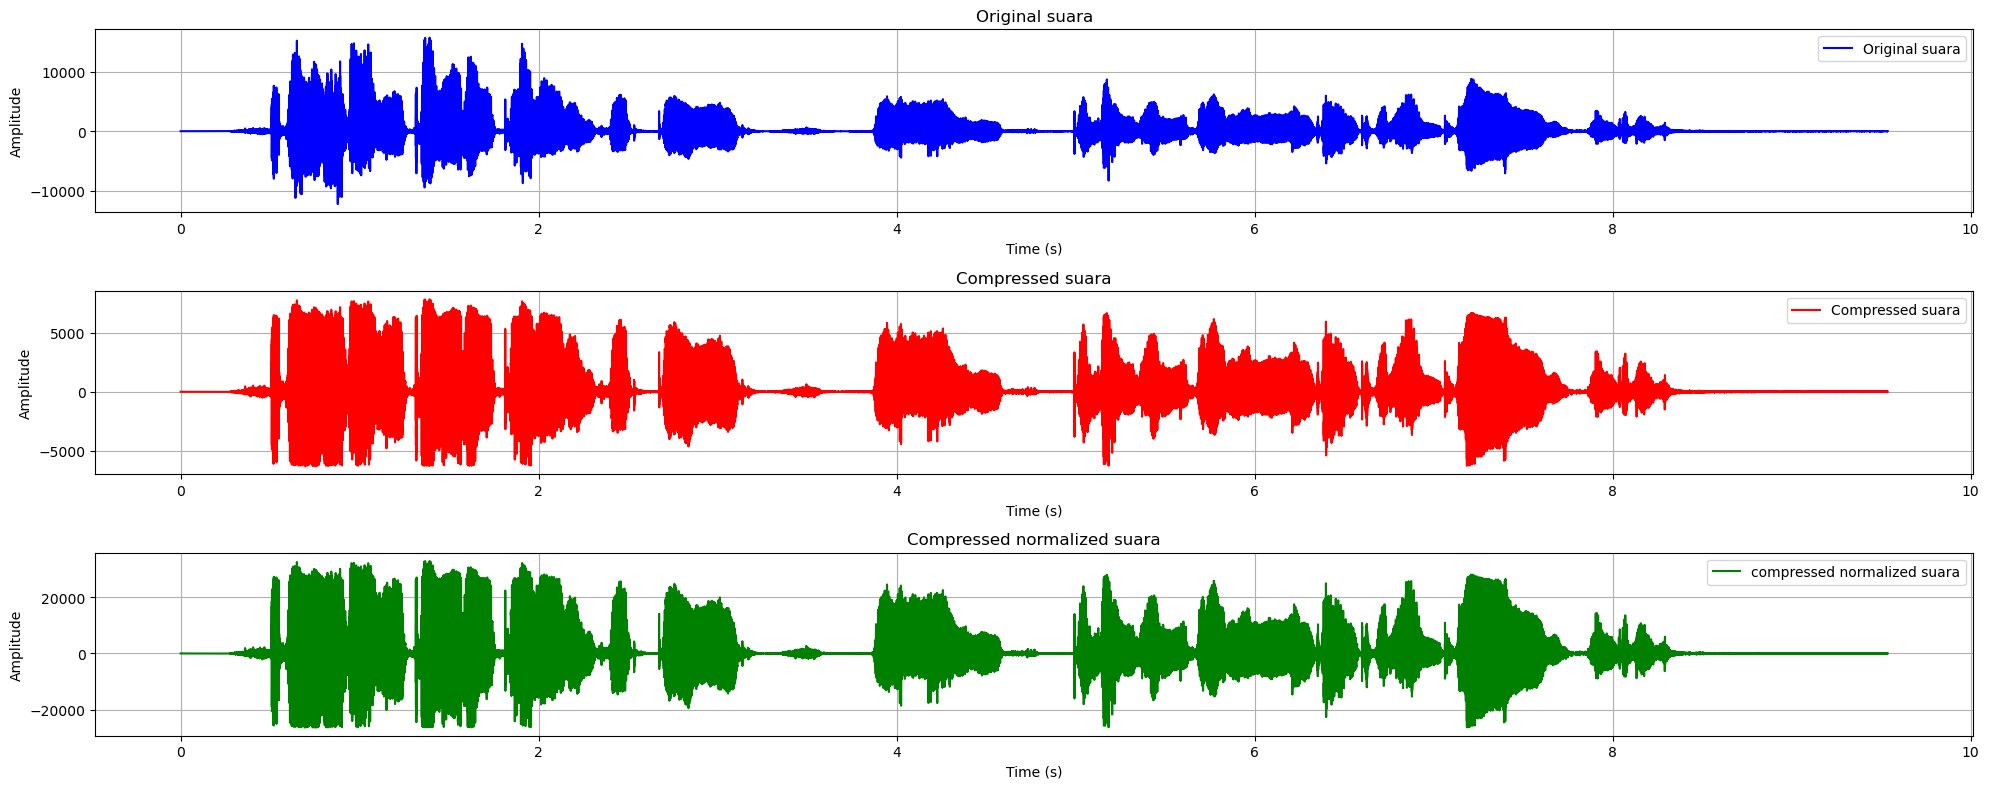

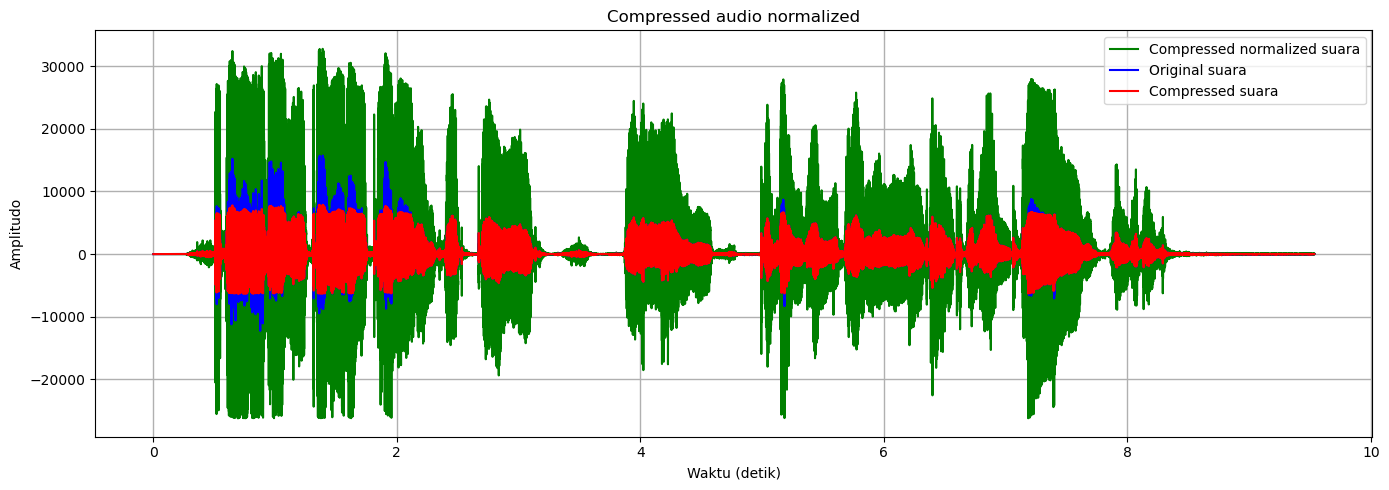

In [83]:
sumbu_time = np.linspace(0, jumlah_samples/frek, jumlah_samples)
ax, fig = plt.subplots(3, 1, figsize=(20, 8))
fig[0].plot(sumbu_time, data_suara, color='blue', label='Original suara')
fig[0].set_xlabel('Time (s)')
fig[0].set_ylabel('Amplitude')
fig[0].set_title('Original suara')
fig[0].grid(True)
fig[1].plot(sumbu_time, compressed_data_suara, color='red', label='Compressed suara')
fig[1].set_xlabel('Time (s)')
fig[1].set_ylabel('Amplitude')
fig[1].set_title('Compressed suara')
fig[1].grid(True)
fig[2].plot(sumbu_time, compressed_normalized_suara, color='green', label='compressed normalized suara')
fig[2].set_xlabel('Time (s)')
fig[2].set_ylabel('Amplitude')
fig[2].set_title('Compressed normalized suara')
fig[2].grid(True)
fig[0].legend(loc='upper right')
fig[1].legend(loc='upper right')
fig[2].legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 5))
plt.plot(sumbu_time, compressed_normalized_suara, color='green', label='Compressed normalized suara')
plt.plot(sumbu_time, data_suara, color='blue', label='Original suara')
plt.plot(sumbu_time, compressed_data_suara, color='red', label='Compressed suara')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Compressed audio normalized')
plt.legend(loc='upper right')
plt.grid(linestyle=fig_linestyle, linewidth=fig_linewidth)
plt.tight_layout()
plt.show()


In [84]:
nilai_max_suara = np.max(np.abs(compressed_normalized_suara))
print(f'Maksimum nilai amplitudo audio: {nilai_max_suara}')

Maksimum nilai amplitudo audio: 32767


In [85]:
float_data_suara = compressed_normalized_suara.astype(np.float32) / 32767.0

In [86]:
saringan_suara = np.zeros_like(float_data_suara)

for i in range(len(float_data_suara)):
    if i < 2:
        # Jika i kurang dari 2, tidak bisa menggunakan filter (terlalu sedikit data), salin data aslinya
        saringan_suara[i] = float_data_suara[i]
    else:
        # Aplikasi filter IIR menggunakan koefisien b dan a
        saringan_suara[i] = (b[0] * float_data_suara[i] + 
                             b[1] * float_data_suara[i-1] + 
                             b[2] * float_data_suara[i-2] - 
                             a[1] * saringan_suara[i-1] - 
                             a[2] * saringan_suara[i-2])


In [87]:
mean_square_suara = np.mean(np.square(float_data_suara))
print(f'Mean Square Audio Sekarang: {mean_square_suara:.5f}')

Mean Square Audio Sekarang: 0.03997


In [88]:
rumus_lufs = -0.691 + 10 * np.log10(mean_square_suara)
print(f'LUFS Audio Sekarang: {rumus_lufs:.5f}')


LUFS Audio Sekarang: -14.67343


setelah di kompresi dan normalisasi, LUFS sudah di angka -14.67343 menunjukkan prosesnya telat dilakukan 

In [89]:
save_jalur_suara = os.path.join(os.getcwd(), 'data', 'Compressed-suara_gagal-Normalized_suara')
with wave.open(save_jalur_suara, 'w') as file_wav:
 file_wav.setnchannels(jumlah_channels)
 file_wav.setsampwidth(lebar_sample)
 file_wav.setframerate(frek)
 file_wav.writeframes(compressed_normalized_suara.tobytes())


Soal Nomor 4:
Rekamlah sebuah audio dengan menggunakan handphone / laptop anda. Cara anda merekam haruslah sedikit unik:
   Anda harus berbicara selama 20 detik.
  Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
  Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
   Lakukanlah equalisasi pada audio tersebut dengan menggunakan bandpass.
Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
  Visualisasikan spektrum frekuensi dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).


suara yang digunakan adalah rekaman suara yang diubah ke dalam wav 16 bit dan mono menggunakan online audio converter

Number of channels: 1
Sample width: 2
Sampling rate: 44100
Number of samples: 1052756


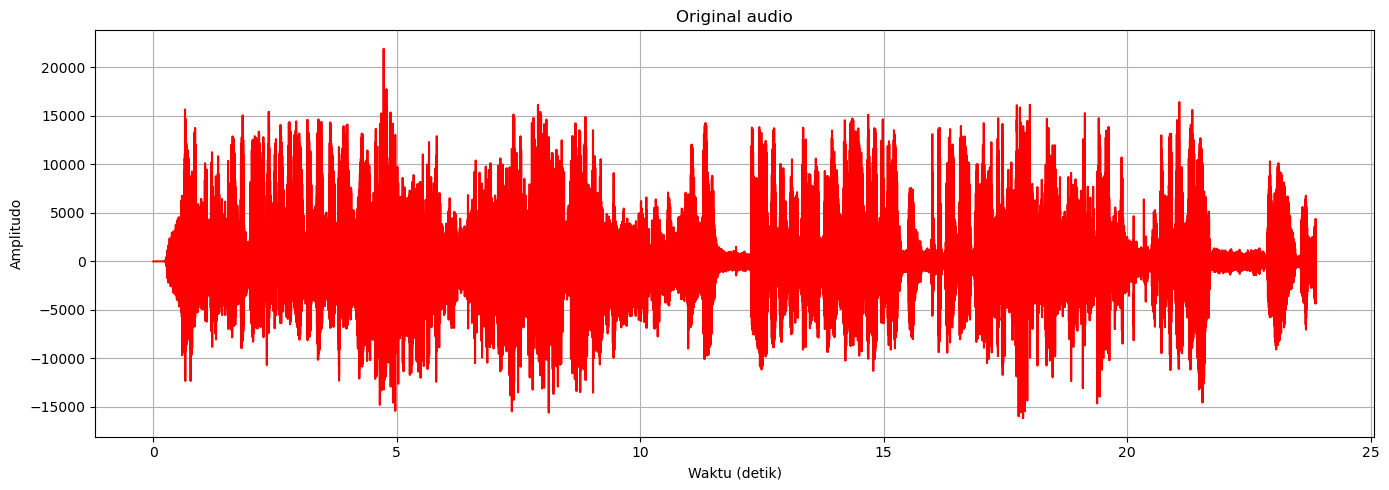

In [90]:
file_jalur = os.path.join(os.getcwd(), 'suara_rekaman.wav')
if not os.path.exists(file_jalur):
 print('File not found:', file_jalur)
with wave.open(file_jalur, 'r') as file_wav:
 jumlah_channels = file_wav.getnchannels()
 lebar_sample = file_wav.getsampwidth()
 frek = file_wav.getframerate()
 jumlah_samples = file_wav.getnframes()
 konten_audio = file_wav.readframes(jumlah_samples)
 data_suara = np.frombuffer(konten_audio, dtype=np.int16)
print('Number of channels:', jumlah_channels)
print('Sample width:', lebar_sample)
print('Sampling rate:', frek)
print('Number of samples:', jumlah_samples)
sumbu_time = np.linspace(0, jumlah_samples / frek, jumlah_samples)
plt.figure(figsize=(14, 5))
plt.plot(sumbu_time, data_suara, color='red')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Original audio')
plt.grid(True)
plt.tight_layout()
plt.show()


visualisasi spektrum frekuensi

In [91]:
def make_frequency_spectrum(data_suara, frek, title):
    periode = np.fft.fft(data_suara)
    frequencies_spectrum = np.fft.fftfreq(len(periode), 1 / frek)
    frequency_positif = frequencies_spectrum[:len(frequencies_spectrum) // 2]
    magnitude_spectrum = np.abs(periode[:len(frequencies_spectrum) // 2])
    
    plt.figure(figsize=(20, 8))
    plt.plot(frequency_positif, magnitude_spectrum, color='blue')
    plt.xscale('log')
    plt.xlim(20, 20000)
    
    # Sesuaikan jumlah label dengan jumlah ticks
    plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000],
               ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz'])
    
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitudo')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


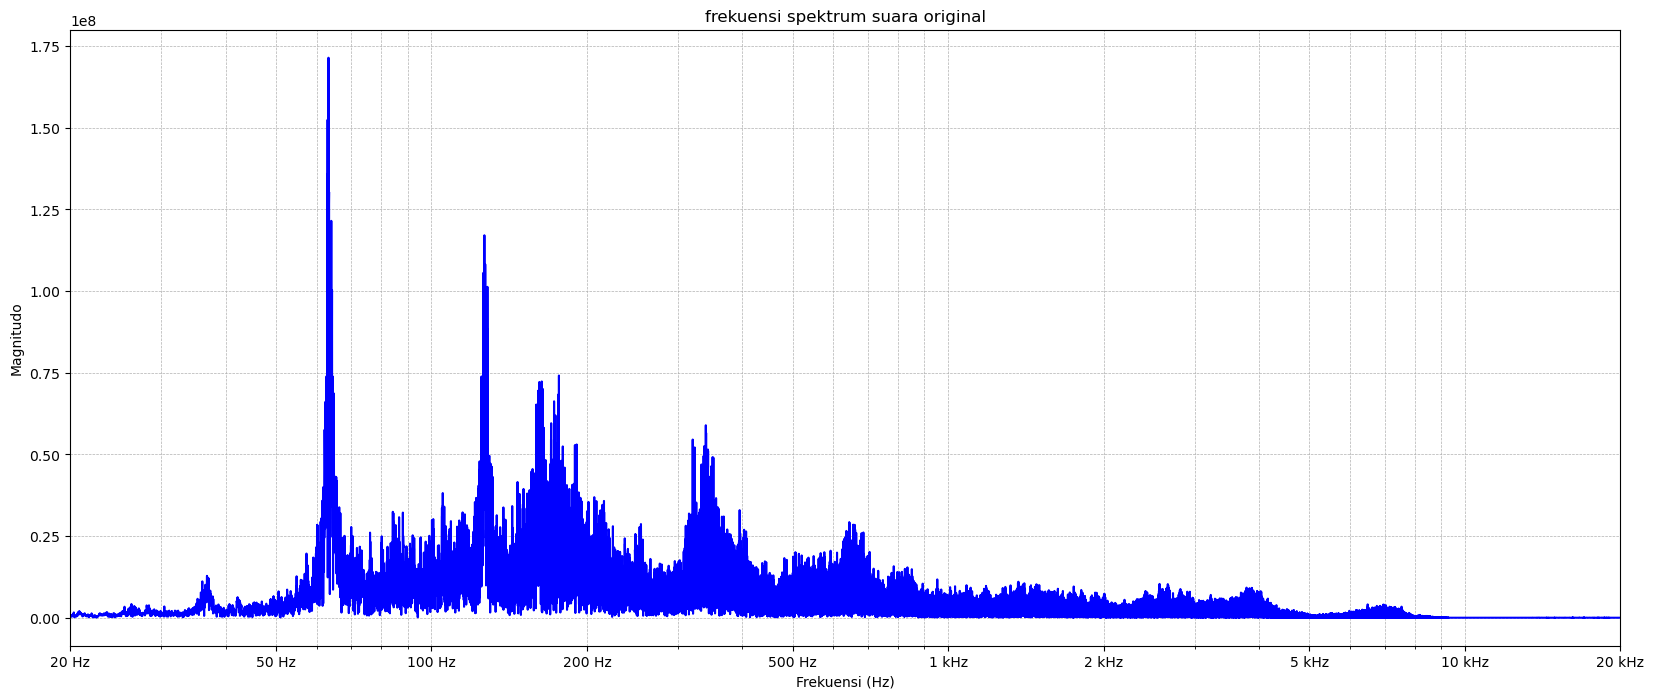

In [92]:
make_frequency_spectrum(data_suara, frek, 'frekuensi spektrum suara original')

mengimplementasikan filter

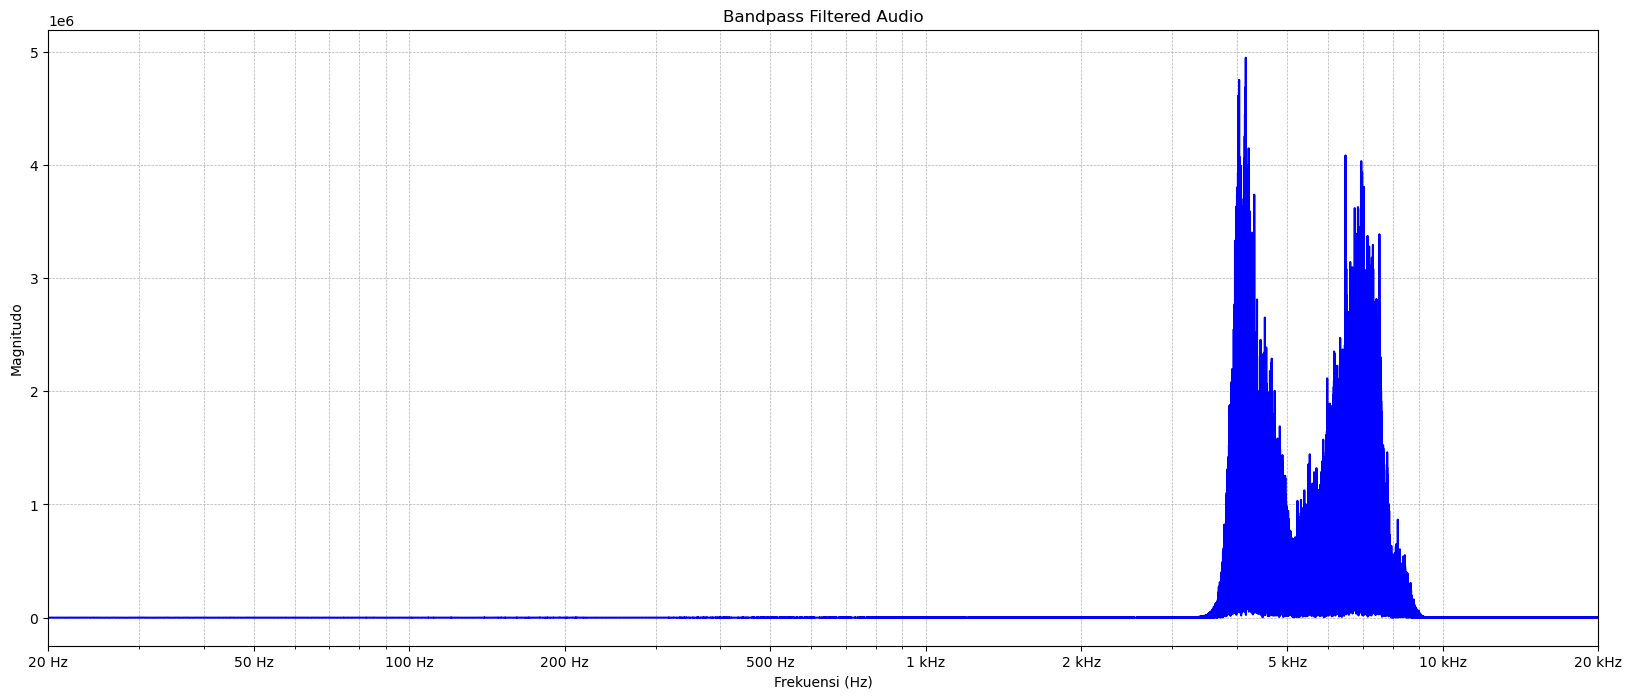

In [93]:
from scipy.signal import butter, filtfilt

# Definisi frekuensi cut-off dan order filter
cut_off_low_hz = 4000
cut_off_high_hz = 12000
order_cut_off = 12

# Menghitung frekuensi cut-off berdasarkan Nyquist frequency
cut_off_nyquist_low = cut_off_low_hz / (frek / 2)
cut_off_nyquist_high = cut_off_high_hz / (frek / 2)

# Membuat filter bandpass menggunakan fungsi butter
b, a = butter(order_cut_off, [cut_off_nyquist_low, cut_off_nyquist_high], btype='band')

# Terapkan filter bandpass pada data audio
bandpass_filtered_audio = filtfilt(b, a, data_suara)

# Ubah hasil filter menjadi tipe data int16 (sesuai format audio standar)
bandpass_filtered_audio = bandpass_filtered_audio.astype(np.int16)

# Membuat spektrum frekuensi dari hasil filter bandpass
make_frequency_spectrum(bandpass_filtered_audio, frek, 'Bandpass Filtered Audio')


In [94]:
simpan_keluaran_suara = os.path.join(os.getcwd(), 'Bandpass-saringan-suara-2')
with wave.open(simpan_keluaran_suara, 'w') as file_wav:
 file_wav.setnchannels(jumlah_channels)
 file_wav.setsampwidth(lebar_sample)
 file_wav.setframerate(frek)
 file_wav.writeframes(bandpass_filtered_audio.tobytes())

Soal Nomor 5:
Tanyakan pada AI/LLM bagaimana cara membuat noise gate pada audio. Lalu implementasikan noise gate ini pada audio yang telah anda rekam. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda. Gunakan file audio dari soal nomor 4.


**Cara Kerja Noise Gate**:
- **Ambang Batas (Threshold)**: Noise gate diatur dengan ambang batas tertentu. Ketika sinyal audio melebihi ambang ini, noise gate "terbuka" dan membiarkan sinyal audio mengalir.
- **Menutup Jalur Sinyal**: Jika sinyal audio berada di bawah ambang batas yang ditentukan (seperti suara bising atau sangat lembut), noise gate akan "menutup" jalur sinyal, sehingga suara latar belakang yang tidak diinginkan dapat dihilangkan atau diminimalkan.
- **Hold dan Release**: Setelah sinyal turun di bawah ambang batas, terdapat dua parameter tambahan:
  - **Hold**: Durasi di mana gate tetap terbuka setelah sinyal turun di bawah ambang batas.
  - **Release**: Kecepatan gate menutup setelah waktu hold berakhir.

**Kapan Digunakan**:
- **Pengurangan Suara Latar Belakang**: Noise gate sering digunakan dalam rekaman vokal, gitar listrik, atau drum untuk mengurangi suara latar yang tidak diinginkan, seperti dengungan, suara peralatan, atau noise dari ruangan.
- **Pembersihan Rekaman**: Noise gate membantu memastikan hanya sinyal audio yang kuat dan penting yang diteruskan, sehingga hasil akhir menjadi lebih bersih dan bebas dari noise.

Number of channels: 1
Sample width: 2
Sampling rate: 44100
Number of samples: 1052756


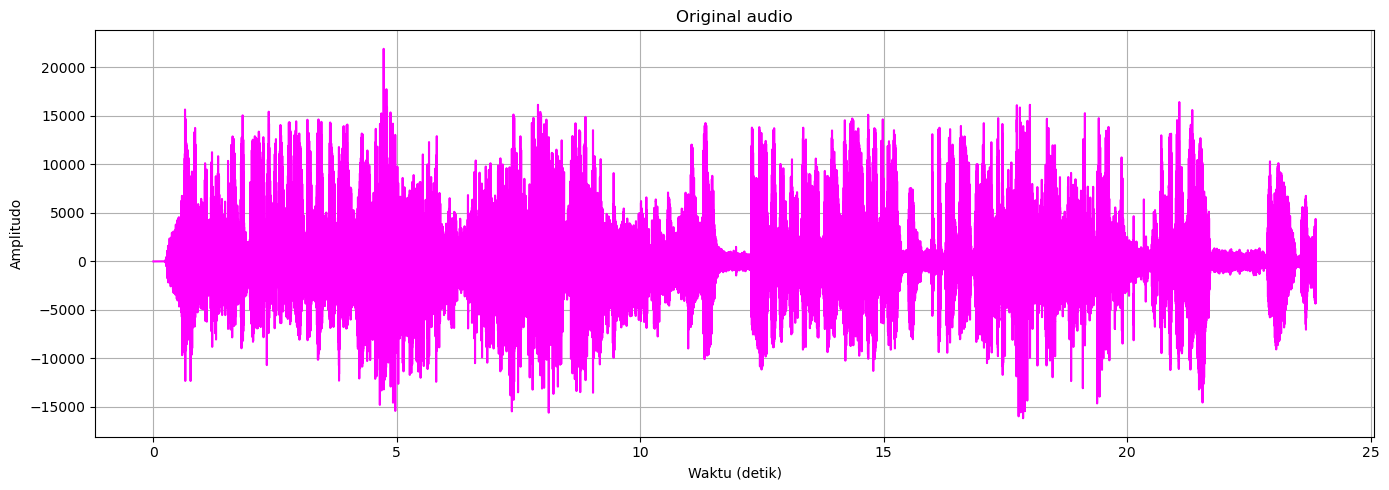

In [95]:
file_jalur = os.path.join(os.getcwd(), 'suara_rekaman.wav')
if not os.path.exists(file_jalur):
 print('File not found:', file_jalur)
with wave.open(file_jalur, 'r') as file_wav:
 jumlah_channels = file_wav.getnchannels()
 lebar_sample = file_wav.getsampwidth()
 frek = file_wav.getframerate()
 jumlah_samples = file_wav.getnframes()
 konten_audio = file_wav.readframes(jumlah_samples)
 data_suara = np.frombuffer(konten_audio, dtype=np.int16)
print('Number of channels:', jumlah_channels)
print('Sample width:', lebar_sample)
print('Sampling rate:', frek)
print('Number of samples:', jumlah_samples)
sumbu_time = np.linspace(0, jumlah_samples / frek, jumlah_samples)
plt.figure(figsize=(14, 5))
plt.plot(sumbu_time, data_suara, color='magenta')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Original audio')
plt.grid(True)
plt.tight_layout()
plt.show()


menentukan suara yang memiliki nilai mendekati 0 dan threshold

In [96]:
muffled_audio_amplitude = 1000.0
batas_suara = muffled_audio_amplitude
print(f"Nilai audio yang akan dihapus adalah {muffled_audio_amplitude:.3f} ke bawah")
print(f"Sehingga Threshold audio-nya adalah {batas_suara:.3f}")

Nilai audio yang akan dihapus adalah 1000.000 ke bawah
Sehingga Threshold audio-nya adalah 1000.000


In [97]:
noised_gate_audio = np.where(np.abs(data_suara) < batas_suara, 0, data_suara)
noised_gate_audio = noised_gate_audio.astype(np.int16)


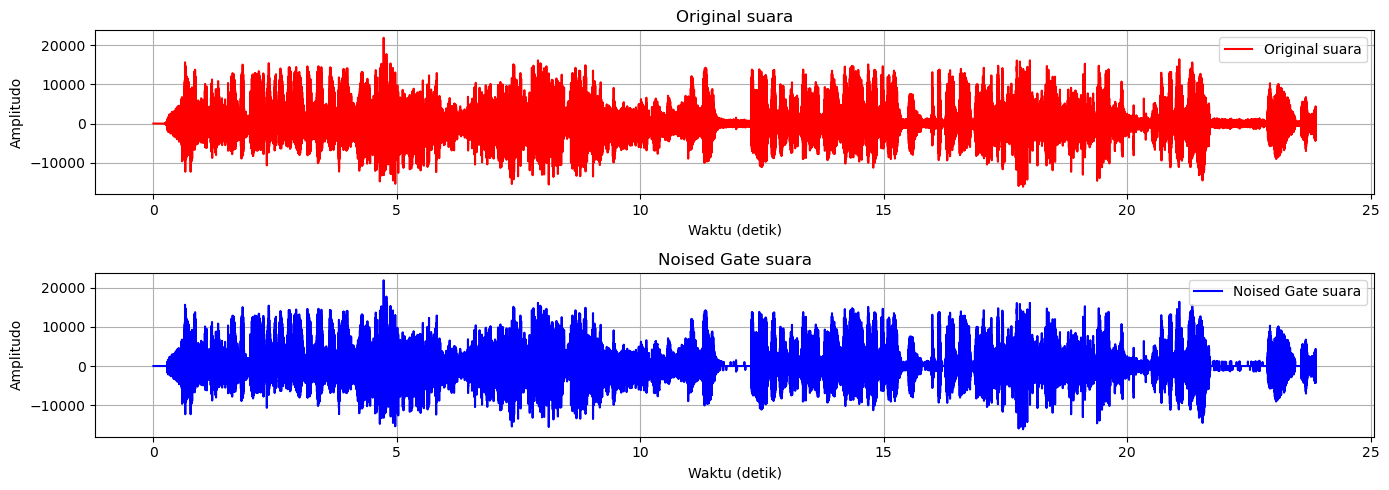

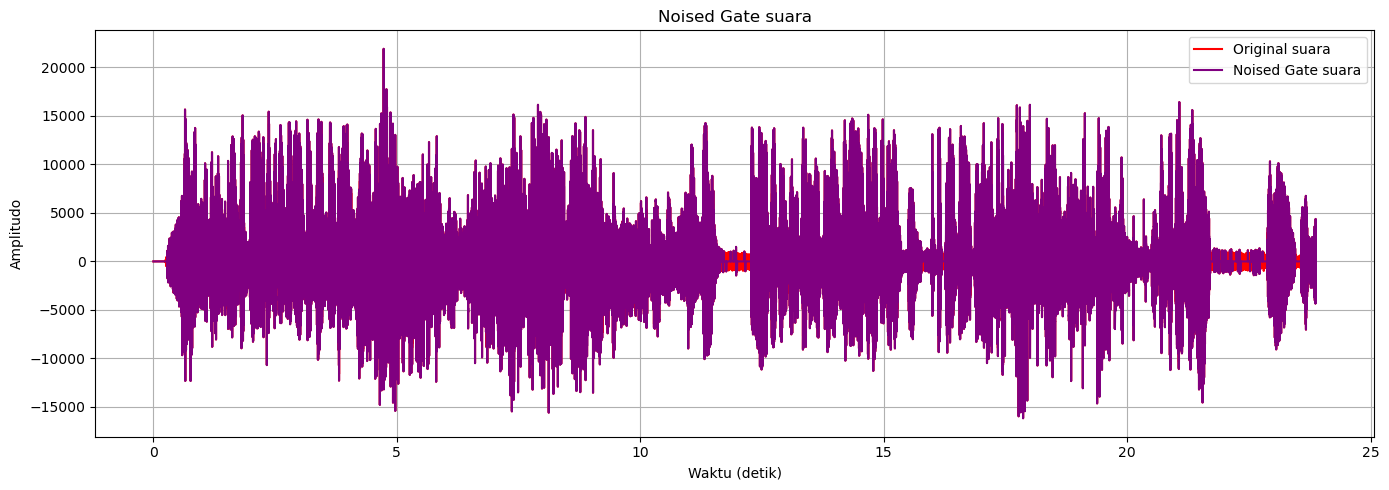

In [98]:
ax, fig = plt.subplots(2, 1, figsize=(14, 5))
fig[0].plot(sumbu_time, data_suara, color='red', label='Original suara')
fig[0].set_xlabel('Waktu (detik)')
fig[0].set_ylabel('Amplitudo')
fig[0].set_title('Original suara')
fig[0].legend(loc='upper right')
fig[0].grid(True)
fig[1].plot(sumbu_time, noised_gate_audio, color='blue', label='Noised Gate suara')
fig[1].set_xlabel('Waktu (detik)')
fig[1].set_ylabel('Amplitudo')
fig[1].set_title('Noised Gate suara')
fig[1].legend(loc='upper right')
fig[1].grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 5))
plt.plot(sumbu_time, data_suara, color='red', label='Original suara')
plt.plot(sumbu_time, noised_gate_audio, color='purple', label='Noised Gate suara')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Noised Gate suara')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [99]:
simpan_keluaran_suara = os.path.join(os.getcwd(), 'Noised-Gate-suara.wav')
with wave.open(simpan_keluaran_suara, 'w') as file_wav:
 file_wav.setnchannels(jumlah_channels)
 file_wav.setsampwidth(lebar_sample)
 file_wav.setframerate(frek)
 file_wav.writeframes(noised_gate_audio.tobytes())

referensi chat gpt

Pertanyaan : jelaskan bagaimana cara untuk mengimplementasikan teknik fading logarithmic scale fading serta rumusnya
Jawaban:
### Teknik Fading Logarithmic Scale

**Fading logarithmic scale** adalah teknik yang sering digunakan dalam pengolahan sinyal audio dan suara untuk mengubah tingkat amplitudo suara dengan cara yang lebih halus dan natural, terutama dalam aplikasi seperti efek fade-in dan fade-out. Teknik ini mengubah amplitudo dengan menggunakan skala logaritmik, yang membuat transisi perubahan amplitudo terasa lebih alami bagi telinga manusia.

### Cara Mengimplementasikan Fading Logarithmic Scale

1. **Persiapkan Data Audio**: Mulailah dengan memuat data audio yang ingin Anda terapkan efek fading. Ini bisa dilakukan dengan menggunakan pustaka seperti `numpy`, `scipy`, atau `librosa`.

2. **Tentukan Durasi Fade**: Tentukan durasi waktu untuk fade-in atau fade-out. Misalnya, jika Anda ingin suara mulai memudar dalam waktu 2 detik.

3. **Buat Vektor Waktu**: Buat vektor waktu yang merepresentasikan periode waktu dari efek fading. Misalnya, untuk fade-in dari 0 hingga 2 detik.

4. **Hitung Faktor Fading**: Gunakan rumus logaritmik untuk menghitung faktor fading yang akan diterapkan pada amplitudo suara.

### Rumus Fading Logarithmic Scale

Untuk implementasi, Anda dapat menggunakan rumus berikut:

- **Fade-In**: 
  \[
  A(t) = A_{\text{max}} \times \left(\frac{t}{T}\right)^{\alpha}
  \]

- **Fade-Out**: 
  \[
  A(t) = A_{\text{max}} \times \left(1 - \frac{t}{T}\right)^{\alpha}
  \]

Di mana:
- \( A(t) \) adalah amplitudo pada waktu \( t \).
- \( A_{\text{max}} \) adalah amplitudo maksimum dari sinyal audio.
- \( T \) adalah durasi fade dalam detik.
- \( t \) adalah waktu yang telah berlalu (0 hingga \( T \)).
- \( \alpha \) adalah parameter yang mengatur kecepatan transisi. Nilai \( \alpha > 1 \) membuat transisi lebih tajam, sementara \( 0 < \alpha < 1 \) membuatnya lebih halus.

### Langkah-langkah Implementasi

1. **Persiapkan Lingkungan**:
   - Pastikan Anda telah menginstal pustaka yang diperlukan, seperti `numpy` dan `scipy`.

2. **Muat Data Audio**:
   ```python
   import numpy as np
   import soundfile as sf

   # Memuat data audio
   audio_data, sample_rate = sf.read('file_audio.wav')
   ```

3. **Tentukan Durasi Fade**:
   ```python
   duration_fade = 2.0  # Durasi fade dalam detik
   alpha = 2.0          # Parameter untuk pengaturan kehalusan fade
   ```

4. **Buat Vektor Waktu**:
   ```python
   t = np.linspace(0, duration_fade, int(sample_rate * duration_fade), endpoint=False)
   ```

5. **Hitung Faktor Fading**:
   - Untuk Fade-In:
   ```python
   fade_in = (t / duration_fade) ** alpha
   ```
   - Untuk Fade-Out:
   ```python
   fade_out = (1 - (t / duration_fade)) ** alpha
   ```

6. **Terapkan Fading pada Data Audio**:
   ```python
   # Terapkan fade-in pada awal audio
   audio_data[:len(fade_in)] *= fade_in

   # Terapkan fade-out pada akhir audio
   audio_data[-len(fade_out):] *= fade_out
   ```

7. **Simpan atau Putar Kembali Audio**:
   ```python
   # Simpan audio yang sudah diproses
   sf.write('file_audio_faded.wav', audio_data, sample_rate)
   ```

### Kesimpulan
Dengan mengikuti langkah-langkah ini, Anda dapat mengimplementasikan teknik fading logarithmic scale untuk audio, yang membuat transisi volume menjadi lebih halus dan alami. Teknik ini sangat berguna dalam pengolahan audio, terutama dalam produksi musik dan pengeditan suara.

pertanyaan: jelaskan bagaimana membuat noise gate untuk audio dan mengimplementasikannya menggunakan library wave
jawaban:
Membuat noise gate untuk audio menggunakan library `wave` dalam Python melibatkan beberapa langkah, termasuk memuat data audio, menentukan ambang batas (threshold), serta menerapkan logika untuk membuka dan menutup jalur sinyal. Berikut adalah langkah-langkahnya:

### Langkah-langkah Membuat Noise Gate

1. **Persiapan**: Pastikan Anda memiliki library yang diperlukan. Anda akan menggunakan `wave` untuk memanipulasi file audio dan `numpy` untuk operasi matematis.

2. **Muat File Audio**: Gunakan library `wave` untuk membuka file audio dan baca data audio.

3. **Tentukan Ambang Batas**: Tetapkan ambang batas (threshold) untuk menentukan kapan noise gate harus terbuka dan kapan harus menutup.

4. **Terapkan Noise Gate**: Iterasi melalui data audio dan terapkan logika untuk membuka dan menutup noise gate berdasarkan nilai amplitudo dibandingkan dengan ambang batas.

5. **Simpan Audio yang Diproses**: Setelah menerapkan noise gate, simpan audio yang sudah diproses ke file baru.

### Contoh Implementasi

Berikut adalah contoh implementasi noise gate menggunakan library `wave` dan `numpy`:

```python
import wave
import numpy as np

def apply_noise_gate(input_file, output_file, threshold, hold_time, release_time, sample_rate):
    # Membuka file audio
    with wave.open(input_file, 'r') as wav_file:
        n_frames = wav_file.getnframes()
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        
        # Membaca data audio
        audio_data = wav_file.readframes(n_frames)
        
        # Mengonversi data audio menjadi array numpy
        audio_array = np.frombuffer(audio_data, dtype=np.int16)

    # Menentukan panjang hold dan release dalam sampel
    hold_samples = int(hold_time * sample_rate)
    release_samples = int(release_time * sample_rate)

    # Inisialisasi noise gate
    noise_gate_open = False
    output_array = np.zeros_like(audio_array)
    hold_counter = 0
    
    for i in range(len(audio_array)):
        # Memeriksa apakah amplitudo saat ini melebihi ambang batas
        if abs(audio_array[i]) > threshold:
            noise_gate_open = True
            hold_counter = hold_samples  # Reset hold counter
        elif noise_gate_open:
            if hold_counter > 0:
                output_array[i] = audio_array[i]  # Izinkan suara selama hold
                hold_counter -= 1
            else:
                noise_gate_open = False
        
        # Jika noise gate tidak terbuka, set output ke 0
        if not noise_gate_open:
            output_array[i] = 0

    # Mengonversi kembali output array ke bentuk bytes
    output_data = output_array.astype(np.int16).tobytes()

    # Menyimpan file audio yang sudah diproses
    with wave.open(output_file, 'w') as wav_out:
        wav_out.setnchannels(n_channels)
        wav_out.setsampwidth(sample_width)
        wav_out.setframerate(sample_rate)
        wav_out.writeframes(output_data)

# Contoh penggunaan
input_audio_file = 'input_audio.wav'
output_audio_file = 'output_audio.wav'
threshold_value = 1000  # Ambang batas untuk noise gate
hold_time_seconds = 0.1  # Waktu hold dalam detik
release_time_seconds = 0.2  # Waktu release dalam detik
sample_rate_value = 44100  # Sampling rate

apply_noise_gate(input_audio_file, output_audio_file, threshold_value, hold_time_seconds, release_time_seconds, sample_rate_value)
```

### Penjelasan Kode

1. **Membuka File Audio**: Kode membuka file audio menggunakan `wave.open` dan membaca semua frame audio.

2. **Konversi ke Array Numpy**: Data audio yang dibaca diubah menjadi array `numpy` untuk memudahkan manipulasi.

3. **Tentukan Hold dan Release**: Menghitung jumlah sampel untuk waktu hold dan release berdasarkan `sample_rate`.

4. **Terapkan Noise Gate**: Dengan iterasi, kode memeriksa apakah amplitudo saat ini melebihi ambang batas. Jika iya, noise gate terbuka. Jika tidak, akan diperiksa apakah sedang dalam waktu hold. Jika tidak, output diatur ke nol.

5. **Simpan Audio yang Diproses**: Setelah selesai, output disimpan dalam file baru.

### Kesimpulan

Dengan mengikuti langkah-langkah dan kode di atas, Anda dapat membuat dan menerapkan noise gate pada file audio menggunakan library `wave` di Python. Ini dapat membantu mengurangi suara latar yang tidak diinginkan dan meningkatkan kualitas rekaman audio.